# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 15 (Tuesday) 11:00 pm </b> </font>

<font color="blue">Jeet Jivrajani </font>

# I. Introduction

The assignment is about solving classification problemm using 4 different methods. The 4 different method includes  **Pocket Algorithm, Quadratic Discriminant Analysis, Linear Discriminant Analysis, and Logistic Regression.** The dataset used is **Online Shoppers Purchasing Intention Dataset Data Set.** At the end comparing all the methods using different evaluation metrics like **Confusion matrix, F1 score, and Train-Test Accuracy.**

# II. Data



**Introduction of data for classification**
<Br> Dataset consists of feature vectors belonging to 12,330 sessions. It contains 10,422 negative class samples and 1908 positive class samples. It contains 18 attributes. The attributes has the information of the pages and time interval the user has visited that particular page. It also has the user system information, browser, region, and traffic information. It also keeps track of the users who enters the webpage and leave the page without triggering any requests. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.
   
   **Source**  
1. C. Okan Sakar 
Department of Computer Engineering, Faculty of 
Engineering and Natural Sciences, Bahcesehir University, 
34349 Besiktas, Istanbul, Turkey 

2. Yomi Kastro 
Inveon Information Technologies Consultancy and Trade, 
34335 Istanbul, Turkey

**Reading the data**

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import math

df_classification = pd.read_csv('online_shoppers_intention.csv')
df_classification.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


**Preprocessing and Visualization of the Data**

<Br>1. Count and display the missing values.
Since there are no missing values, we do not need to remove or replace any data unless required.
<Br>2. Mapping string data type to inetger using dictionary in python. Columns such as Month, Revenue, Weekend and Visitor Type or perform One hot encoding by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
<Br>3. Perform label_encoding on target class which will bring value between 0 and n_classes-1.
    <Br> Preprocessing of data helps to visualize the data and infer the patterns from the data.


In [249]:
df_classification.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [250]:
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

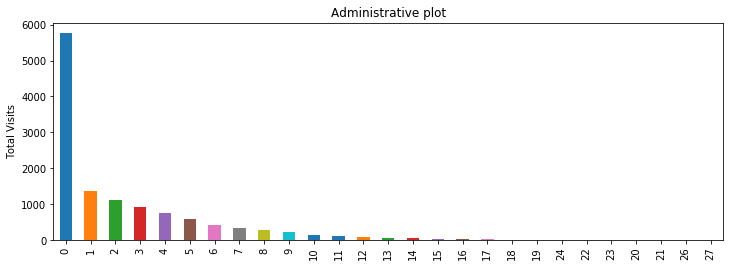

In [251]:
df_classification["Administrative"].value_counts().plot.bar(figsize=(12,4))
plt.title("Administrative plot")
plt.ylabel("Total Visits")
plt.show()

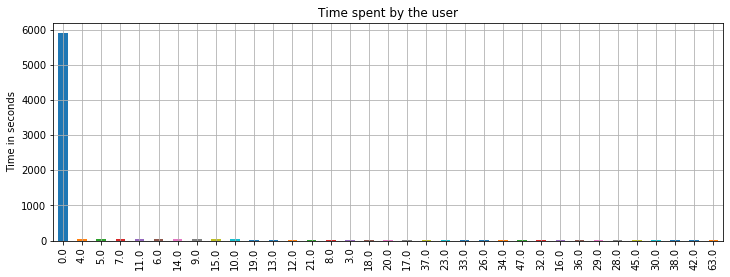

In [252]:
df_classification["Administrative_Duration"].value_counts().head(35).plot.bar(figsize=(12,4))
plt.grid()
plt.title("Time spent by the user")
plt.ylabel("Time in seconds")
plt.show()

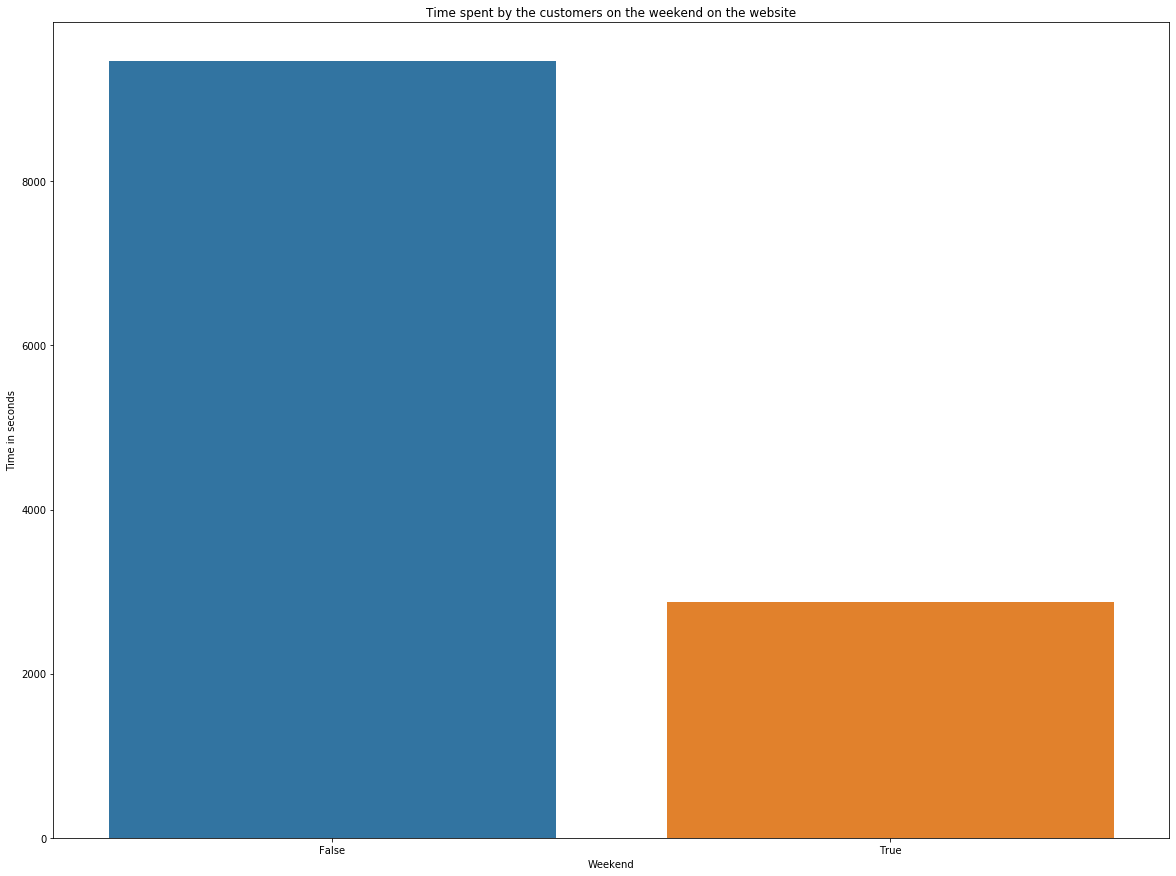

In [253]:
sns.countplot(x="Weekend",data=df_classification)
plt.title("Time spent by the customers on the weekend on the website")
plt.ylabel("Time in seconds")
plt.show()

Text(0.5, 1, 'Heatmap for the Features')

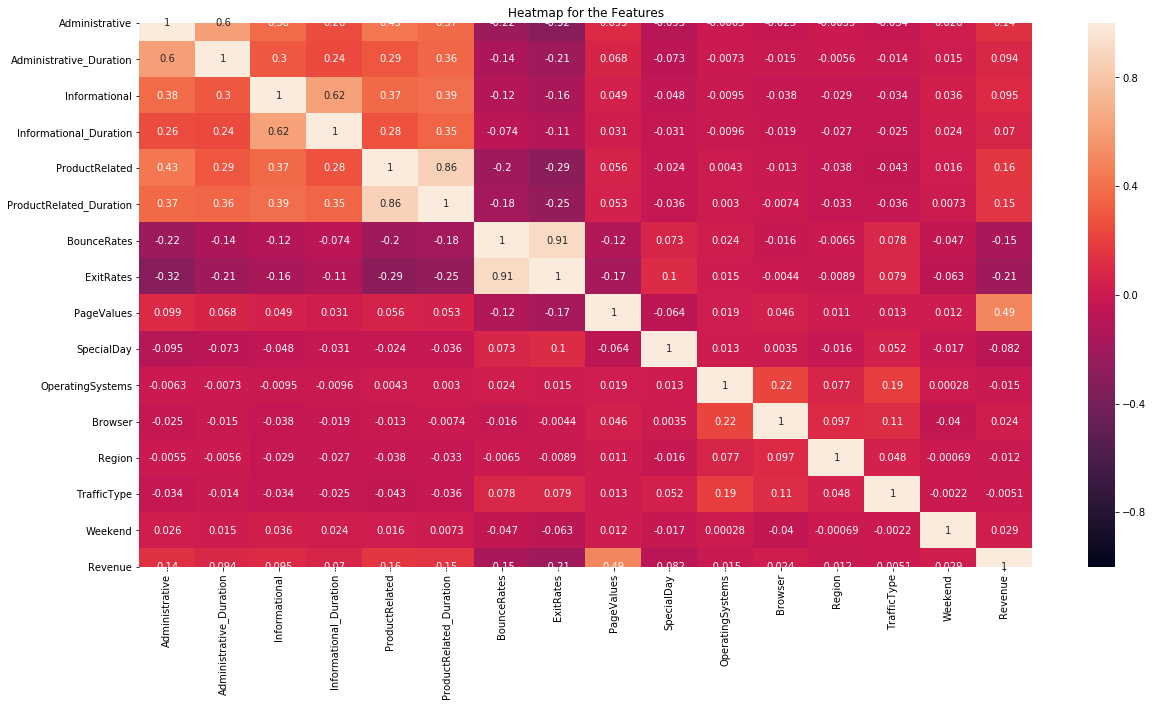

In [254]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(df_classification.corr(),vmin=-1,vmax=1,annot=True)
plt.title("Heatmap for the Features")

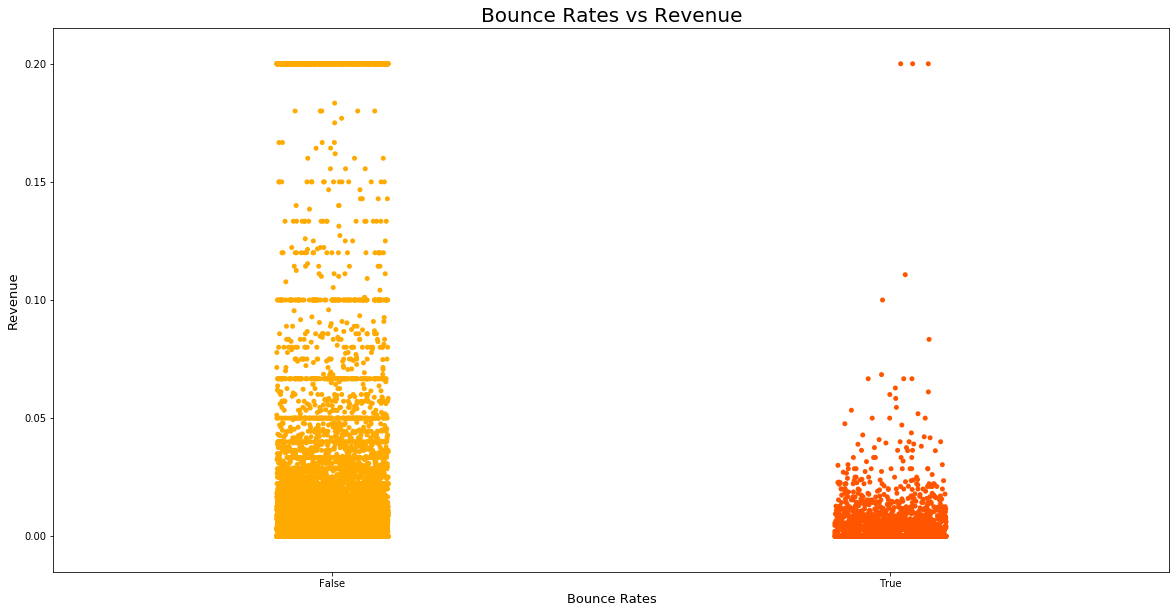

In [255]:
sns.stripplot(df_classification['Revenue'], df_classification['BounceRates'], palette = 'autumn_r')
plt.title('Bounce Rates vs Revenue', fontsize = 20)
plt.xlabel('Bounce Rates', fontsize = 13)
plt.ylabel('Revenue', fontsize = 13)

plt.show()


In [256]:
drop = ['Administrative','Administrative_Duration','Informational','Informational_Duration','Month','OperatingSystems','Browser','PageValues','SpecialDay','Weekend','VisitorType']
df_classification=df_classification.drop(columns=drop)

In [257]:
df_classification_new = pd.get_dummies(df_classification)

In [258]:
le = LabelEncoder()
df_classification['Revenue'] = le.fit_transform(df_classification['Revenue'])
print(df_classification['Revenue'].value_counts())
revenue = {False:0, True: 1}
df_classification_new['Revenue'] = df_classification_new['Revenue'].apply(lambda x: revenue[x])
df_classification['Revenue'] = df_classification['Revenue'].apply(lambda x: revenue[x])
df_classification.head()

0    10422
1     1908
Name: Revenue, dtype: int64


,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Region,TrafficType,Revenue
0,1,0.000000,0.20,0.20,1,1,0
1,2,64.000000,0.00,0.10,1,2,0
2,1,0.000000,0.20,0.20,9,3,0
3,2,2.666667,0.05,0.14,2,4,0
4,10,627.500000,0.02,0.05,1,4,0


In [259]:
X = df_classification_new
T = df_classification['Revenue']

print("Shape of X:", X.shape)
print("Shape of T:", T.shape)
X.head()

Shape of X: (12330, 7)
Shape of T: (12330,)


,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Region,TrafficType,Revenue
0,1,0.000000,0.20,0.20,1,1,0
1,2,64.000000,0.00,0.10,1,2,0
2,1,0.000000,0.20,0.20,9,3,0
3,2,2.666667,0.05,0.14,2,4,0
4,10,627.500000,0.02,0.05,1,4,0


**Visualization of Data**

There are different kind of visualization techniques for visualizing the data like scatter plot, heat map, bar plot, histogram plot and many more.
1. Plotted the graph of the Administrative vs the number of different kinds of webpages visited in the session to infer the relation between them.
2. Then plotted the graph of inital 35 data of time spent in first session in one page, to check how frequently the user changes the webpage.
3. Further plotted the graph to observe the traffic on the webpage and time spent by the user on the weekend.
4. Generated the graphs of the all the features with all the other features by using the pairplot[5] to check which features are more corelated and which features are uncorelated.
5. Further generated the heatmap[4] to quantify the corelation of the pairplots.

In [260]:
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    idxs = np.random.permutation(X.index)
    
    N = X.shape[0]
    
    features = []
    labels = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            features.append(X.iloc[i:, :])
            labels.append(T.iloc[i:, :])
        else:
            features.append(X.iloc[i:i+nrows, :])
            labels.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return features, labels

In [261]:
X_data = df_classification_new.iloc[:,0:6]
T_label = df_classification_new.iloc[:,6:]

split_feature, split_label = partition(X_data, T_label)
X_train, X_test = [i.values for i in split_feature]
y_train, y_test = [j.values for j in split_label]
print("Training data shape: ",X_train.shape,"\nTesting label shape: ",y_train.shape,"\nTraining data shape: ",X_test.shape,"\nTesting label shape:",y_test.shape)
print("Xtrain: ",X_train)
print("y_train: ",y_train)
print("Xtrain: ",X_test)
print("y_train: ",y_test)

Training data shape:  (9864, 6) 
Testing label shape:  (9864, 1) 
Training data shape:  (2466, 6) 
Testing label shape: (2466, 1)
Xtrain:  [[1.00000000e+00 0.00000000e+00 2.00000000e-01 2.00000000e-01
  1.00000000e+00 1.00000000e+00]
 [2.00000000e+00 6.40000000e+01 0.00000000e+00 1.00000000e-01
  1.00000000e+00 2.00000000e+00]
 [1.00000000e+00 0.00000000e+00 2.00000000e-01 2.00000000e-01
  9.00000000e+00 3.00000000e+00]
 ...
 [5.00000000e+00 7.30000000e+01 1.20000000e-01 1.60000000e-01
  2.00000000e+00 3.00000000e+00]
 [2.00000000e+01 7.38910714e+02 1.73913040e-02 2.36714980e-02
  1.00000000e+00 2.00000000e+00]
 [5.00000000e+00 8.35000000e+01 0.00000000e+00 1.48148150e-02
  9.00000000e+00 3.00000000e+00]]
y_train:  [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
Xtrain:  [[1.00000000e+00 0.00000000e+00 2.00000000e-01 2.00000000e-01
  3.00000000e+00 1.00000000e+00]
 [2.20000000e+01 1.74900000e+03 0.00000000e+00 1.50000000e-02
  3.00000000e+00 1.00000000e+01]
 [7.00000000e+00 1.40458333e+02 2.857142

# III. Method


# Pocket Algorithm
A single perceptron is a linear model that applies a step function on the linear output. 
For classification, it iterate over the training examples, and update the weights in a way that would result in correct classification. **Pocket Algorithm** is the exntension of the perceptron algorithm it stores the best weight during the interations in the pocket. When the data is not linearly separable, there is no guarantee on convergence. Thus, for training, we need to set the maximum number of iteration. Also, the algorithm selects an arbitrary hyperplane that divides two classes, so it is possible to discover a decision boundary that is not the best. To combine both positive and negative cases, we can use the target sample $t_i$ in our update, 

$$
w^{(k+1)} = w^{(k)} + \alpha t_ix_i
$$

Here from the above equation pocket stores the best weight and compute fot the rest of the iteration for finding the bestest solution and stores it.

# QDA

Observation of each class in QDA are drawn from a Gaussian normal distribution. QDA assumes that each class has its own covariance matrix.
When we have a binary classification problem, $k \in \{-1, +1\}$,

The discriminant function $\delta_k(x)$ as

$$
\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k). 
$$

Now, for a new sample $\tilde{x}$, we can predict the label with

$$
y = \arg\max_k \delta_k(\tilde{x}). 
$$

The decision boundary is placed where the discriminant functions meet such as $\delta_1 == \delta_2$. 

Since the $\delta_k$ function is quadratic in $x$, the decision boundary is quadratic. 
We call this approach as **Quadratic Discriminant Analysis (QDA)**. 



# LDA

LDA is similar to the QDA but it makes some simplifying assumptions about your data[2]:
1. That your data is Gaussian, that each variable is is shaped like a bell curve when plotted.
2. Each attribute in the data has the same variance, that values of each variable change around the mean by the same amount on average.
With these assumptions, the LDA model estimates the mean and variance from your data for each class. It is easy to think about this in the univariate (single input variable) case with two classes.Unifying the covariance matrix, we can remove the quadratic term in our disciriminant function: 

$$
\delta_k(x) = x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$


LDA makes predictions by estimating the probability that a new set of inputs belongs to each class. The class that gets the highest probability is the output class and a prediction is made.

# Logistic Regression

Consider a linear regression model that directly predicts $P(T=k \mid x)$, not the class label $k$. 
We call this approach as **Logistic Regression**. 

Again, let us use the same linear model for regression: 

$$
\kappa = f(x ; w) = X w.
$$

Thus,

$$
P(T=k \mid x) = h(X w) = h(\kappa) = y.
$$

The logistic function has asymptotes at 0 and 1, and it crosses the y-axis at 0.5. For implementing Logistic regression you need to remember three things:
1. Logistic regression hypothesis
2. Logistic regression decision boundary
3. Logistic regression cost function

Using the gradient, now we can update the weights, 

$$
w_j \leftarrow w_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(x_n)\Big) x_n.
$$

Converting the summation into matrix calculation,

$$
w_j \leftarrow w_j + \alpha X^\top \Big(  t_{*,j} - g_j(X)\Big).
$$


### A. Super Classs Definition

<Br>Base Model is the super class in which there are two abstract methods train and use which are used to implement the **Classification algorithm** Further, Classifier class model inherits the properties and methods of the parent class Base Model by passing **Base Model** class as a parameter. Classfier class contains a constructor which has **mean and standard deviation** variable which is assigned None initially. Further it also has other three methods called **normalize, check_matrix and add_ones** and 2 abstract methods name **train and use** of its parent class. Method Normalize is called when you need to normalize the data for the easy computation. Method check_matrix checks if the matrix shape is 2D matrix or not. If the matrix is not a 2D then it throws error and we need to handle it by adding a bias term or by transposing the matrix whichever is suitable according to the condition. Method add_ones is used to add a bias term in the matrix. Train and use method is defined without implementing the logic of the abstract functions.
 


In [262]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)
            
        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)
        
        # TODO: Finish this normalization
        Xs = (X-self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm

 <Br> - The implementation of the **PocketAlgorithm** method contains the class **PocketAlgorithm** which  inherits **Classifier** class. The constructor of the class calls its parent constructor and initially it initializes the mean and standarad deviation to None. There are three different method in Pocket algorithm class i.e. **compare, train and use.**
    
<Br> - **train method:** It contains two parameter training data and training label. Initially the training data is normalized for easy computation since due to large amount of data it takes longer computation time with the original data values. Then initialize the variables like alpha parameter and number of iterations. There would be two weights in this method. One which will keep the best solution of the weight which is called the pocket weight and other weight is will get updated. The data will look for the convergece once it is converged, it chooses the best weight and update the parameter.
<Br> - **compare:** This method contains 4 parameters i.e. weight, best weight, Data and labels. It compares the weight and updates the weight parameter
<Br> - **use:**This method takes Testing data as the parameter. Same as we performed normalization of the data in the training data we perform normalization on the testing data. Then predict the value for the testing data.

In [263]:
class PocketAlgorithm(Classifier): 
    
    def __init__(self):
        Classifier.__init__(self)
        
    def compare(self, X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
#         print("y:yp",y,yp)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
        
    def train(self, X, T):
        X = X.astype(float)
        X1 = self.normalize(X)

        maxiter = 10
        alpha = 0.01
        self.w = np.zeros(X.shape[1])
        self.w_pocket = self.w
#         print("w_pocket",self.w.shape,self.w_pocket.shape)
        N = X.shape[0]
        
        plt.plot(y_test)
        for i in range(1):
            print("i: ",i)
            converged = True
            for k in np.random.permutation(N):
                
                y = self.w @ X1[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += alpha * T[k] * X1[k]
#                     print("wwww: ",self.w)
                    converged = False
                    if self.compare(X1, T, self.w, self.w_pocket) > 0: 
                        self.w_pocket[:] = self.w[:]
    
            if converged:
                print("converged at ", i)
                break
        print("W pocket: ",self.w_pocket.shape)
        return self.w_pocket 
    
    
    def use(self, X):
        print("w_pocket: ",self.w_pocket.shape)
        X = X.astype(float)
        X = self.normalize(X)
        print("shape of X: ",X)
        y = X@self.w_pocket
        print("y: ",y)
        return y  

### C. QDA

<Br> - The implementation of the **Quadratic Discriminant Analysis** method contains the class **QDA** which  inherits **Classifier** class. The constructor of the class calls its parent constructor and initially it initializes the mean and standarad deviation to None. There are three different method in QDA i.e. **QDA_class, train and use.** Initially all the varialbles like **aprior probability, mean, variance, and samples** are initialized either with the value or None.
 <Br> - **QDA_class:** It takes training data, mean, sigma and prior probability as a input parameter. It calculates different discriminant value for different class.
  <Br> - **train:** It calculates the mean, covariance matrix and prior probability for every individual class.
     <Br> - **use:** Using the covariance matrix of the training data of each individual class, Call the QDA_class method which calculates the discriminant value of two different classes with the same testing data. Then checks which instance of data is maximum and returns the prediction.

In [265]:
class QDA(Classifier): 
    
    def __init__(self):
        Classifier.__init__(self)
        self.prior1 = None
        self.prior2 = None
        self.mu1 = None
        self.mu2 = None
        self.Sigma1 = None
        self.Sigma2 = None
        self.N1 = class_0.shape[0]
        self.N2 = class_1.shape[0]
        self.N = self.N1 + self.N2
      
    @staticmethod
    def QDA_class(X, mu, sigma, prior):
        print("In")
        X = X.astype(float)
        print("sigma: ",sigma.shape)
        sigma_inv = np.linalg.pinv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
                - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
                + np.log(prior)    
    
    def train(self, X):
        X = X.astype(float)
        self.means = np.mean(X, 0)
        self.stds = math.sqrt(np.mean(abs(X - X.mean())**2))
        Xs = (X - self.means) / self.stds
        self.mu1 = np.mean(Xs[:self.N1], 0)
        self.mu2 = np.mean(Xs[self.N1:], 0)

        self.Sigma1 = np.cov(Xs[:self.N1].T)
        self.Sigma2 = np.cov(Xs[self.N1:].T)

        self.prior1 = self.N1 / self.N
        self.prior2 = self.N2 / self.N

        
    def use(self, X):
        XtestS = (X-self.means)/self.stds
        d1 = QDA_class(XtestS, self.mu1, self.Sigma1, self.prior1)
        d2 = QDA_class(XtestS, self.mu2, self.Sigma2, self.prior2)
        df = pd.DataFrame({'d1':d1, 'd2':d2})
        pred=np.where(df['d1']>df['d2'],1,0)
        return pred
        
    

### D. LDA
<Br> - The implementation of the **Linear Discriminant Analysis** method contains the class **LDA** which  inherits **Classifier** class. The constructor of the class calls its parent constructor and initially it initializes the mean and standarad deviation to None. There are three different method in LDA i.e. **LDA_class, train and use.** Initially all the varialbles like **aprior probability, mean, variance, and samples** are initialized either with the value or None.
    <Br> - **LDA_class:** It takes training data, mean, sigma and prior probability as a input parameter. It calculates different discriminant value for different class. The only difference in LDA and QDA is in LDA the covariance matrix is same for all the classes.
  <Br> - **train:** It calculates the mean, covariance matrix and prior probability for every individual class.
     <Br> - **use:** Using the covariance matrix of the training data of each individual class, Call the LDA_class method which calculates the discriminant value of two different classes with the same testing data. Then checks which instance of data is maximum and returns the prediction.

In [267]:
class LDA(Classifier): 
    
    def __init__(self):
        Classifier.__init__(self)
        self.prior1 = None
        self.prior2 = None
        self.mu1 = None
        self.mu2 = None
        self.Sigma = None        
        self.N1 = class_0.shape[0]
        self.N2 = class_1.shape[0]
        self.N = self.N1 + self.N2
        
    @staticmethod
    def LDA_class(X, mu, sigma, prior):
        X =X.astype(float)
        sigma_inv = np.linalg.inv(sigma)
        return np.sum((X @ sigma_inv) * mu \
                    - 0.5 * (mu @ sigma_inv) * mu, axis=1) \
                    + np.log(prior)    
        
    def train(self, X):
        X = X.astype(float)
        self.means = np.mean(X, 0)
        self.stds = math.sqrt(np.mean(abs(X - X.mean())**2))
        Xs = (X - self.means) / self.stds

        self.mu1 = np.mean(Xs[:self.N1], 0)
        print("mu: ",self.mu1)
        self.mu2 = np.mean(Xs[self.N1:], 0)
        print("mu: ",self.mu2)


        self.Sigma = np.cov(Xs.T)
        print("sigma: ",self.Sigma)

        self.prior1 = self.N1 / self.N
        print("sigma: ",self.prior1)

        self.prior2 = self.N2 / self.N
        print("sigma: ",self.prior2)

        
    def use(self,X):
        XtestS = (X - self.means)/self.stds
        self.d1 = LDA_class(XtestS, self.mu1, self.Sigma, self.prior1)
        self.d2 = LDA_class(XtestS, self.mu2, self.Sigma, self.prior2)       
        df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        prediction=np.where(df['d1']>df['d2'],1,0)
        return prediction

### E. Logistic Regression

<Br> - The implementation of the **Logistic Regression** method contains the class **Logistic Regression** which  inherits **Classifier** class. The constructor of the class calls its parent constructor and initially it initializes the mean and standarad deviation to None. There are three different method in Logistic Regression i.e. **softmax, g, train and use.** Initially all the varialbles like **aprior probability, mean, variance, and samples** are initialized either with the value or None.
    
<Br> - **softmax:** Before computing the derivative, let us select the function $h(\cdot)$. 

Since $P(T=k \mid x)$ is probability function, it satisfies 

- the outputs are non-negative,

- the integral of the probability is one. 

To ensure this,

$$
P(T=k \mid x) = \frac{\kappa_k}{\sum_{c=1}^K \kappa_c}
$$

Since we are working with the logarithm, an exponent is a good idea.

$$
g_k(x) = P(T=k \mid x) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

This function is called as **softmax function**.

<Br> - **g:** It calls the softmax function.
<Br> - **train:** Initally normalize the data, add the bias term, update the weights for every iteration.
 <Br> - **use:** Initially Normalize the test data and classify them by using softmax function

In [268]:
class LogisticRegression(Classifier):

    def __init__(self):
        Classifier.__init__(self)
        
   
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    # for linear fx
    def g(self,X, w):
        return self.softmax(X @ w) 

    def train(self, X, T):
        np.random.seed(100)
        self.w = np.random.rand(X.shape[1]+1, 2)
        X = X.astype(float)
        X = self.normalize(X)

        niter = 10
        alpha = 0.0001
        X1 = self.add_ones(X)
        for step in range(niter):
            ys = self.g(X1, self.w)
            self.w += alpha * X1.T @ (T - ys)
       
        return self.w
   
    def use(self, X):
        X = X.astype(float)
        X = self.normalize(X)
        X1 = self.add_ones(X)
        y = self.g(X1, self.w)
        return y

# IV. Experiments

1. Evaluation metrics:
The classification report shows a representation of the main classification metrics on a per-class basis. This gives a deeper intuition of the classifier behavior over global accuracy which can mask functional weaknesses in one class of a multiclass problem.  

2. Train and test accuracy
<Br> Training accuracy is usually the accuracy you get if you apply the model on the training data, while testing accuracy is the accuracy for the testing data. It's sometimes useful to compare these to identify overtraining. Here in all the cases you can see the training accuracy is higher than the testing accuracy which is true.
3. Plots for results
<Br> ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things.The model performance is determined by looking at the area under the ROC curve (or AUC). The best possible AUC is 1 while the worst is 0.5 (the 45 degrees random line). Any value less than 0.5 means we can simply do the exact opposite of what the model recommends to get the value back above 0.5.
4. Classification model comparision
    - Precision is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is defined as as the ratio of true positives to the sum of true and false positives.
    - Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.
    - The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
    - Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.
    <Br> The confusion matrix is another metric that is often used to measure the performance of a classification algorithm. The predicted classes are represented in the columns of the matrix, whereas the actual classes are in the rows of the matrix. We then have four cases:
<Br> - True positives (TP): the cases for which the classifier predicted ‘Revenue=1’ and the Revenue were actually 1.
<Br> - True negatives (TN): the cases for which the classifier predicted ‘Revenue=0’ and the Revenue were actually 0.
<Br> - False positives (FP): the cases for which the classifier predicted ‘Revenue = 1’ but the Revenue were actually 0.
<Br> - False negatives (FN): the cases for which the classifier predicted ‘Revenue = 0’ but the Revenue were actually 1.
    

# Pocket Algorithm



In [290]:
pa = PocketAlgorithm()
pa.train(X_train, y_train)
plt.clf()

i:  0
W pocket:  (6,)


<Figure size 1440x720 with 0 Axes>

In [291]:
pocket_prediction = pa.use(X_test)
pocket_prediction = np.sign(pocket_prediction)
for i in range(pocket_prediction.shape[0]):
    if pocket_prediction[i]==-1:
        pocket_prediction[i] = 0
# print("Test Accuracy: ",pocket_prediction)

pocket_prediction_train = pa.use(X_train)
pocket_prediction_train = np.sign(pocket_prediction_train)
for i in range(pocket_prediction_train.shape[0]):
    if pocket_prediction_train[i]==-1:
        pocket_prediction_train[i] = 0
# print("Train Accuracy: ",pocket_prediction_train)

w_pocket:  (6,)
shape of X:  [[-0.72385824 -0.71570774  3.89945948  3.48415452 -0.0403065  -0.75294014]
 [-0.33757873  0.09523397 -0.42772053 -0.54202269 -0.0403065   1.27580254]
 [-0.61349266 -0.6505828   0.19044805 -0.12230538  2.39387714 -0.52752429]
 ...
 [-0.63188693 -0.63027835  1.37527113  1.01766759 -0.85170105  1.95205011]
 [-0.46633856 -0.55528131 -0.42772053 -0.41029854 -0.0403065   1.5012184 ]
 [-0.68706971 -0.70585496 -0.42772053  0.58240519 -0.85170105 -0.52752429]]
y:  [-0.58338148  0.06938036 -0.05430879 ... -0.19807761  0.0349271
 -0.07755171]
w_pocket:  (6,)
shape of X:  [[-0.69098945 -0.60274206  3.61506016  3.17336491 -0.90530782 -0.76725978]
 [-0.66680889 -0.56791192 -0.46507343  1.1409206  -0.90530782 -0.51167063]
 [-0.69098945 -0.60274206  3.61506016  3.17336491  2.4486664  -0.25608147]
 ...
 [-0.59426721 -0.56301393  1.98300672  2.36038719 -0.48606105 -0.25608147]
 [-0.23155878 -0.20061133 -0.11027921 -0.4104137  -0.90530782 -0.51167063]
 [-0.59426721 -0.5572996


 Confusion Matrix: 
 [[67 93]
 [ 6 34]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.42      0.58       160
           1       0.27      0.85      0.41        40

    accuracy                           0.51       200
   macro avg       0.59      0.63      0.49       200
weighted avg       0.79      0.51      0.54       200

Testing Accuracy:  41.566307458647664 %
Training Accuracy:  38.29966703699099 %


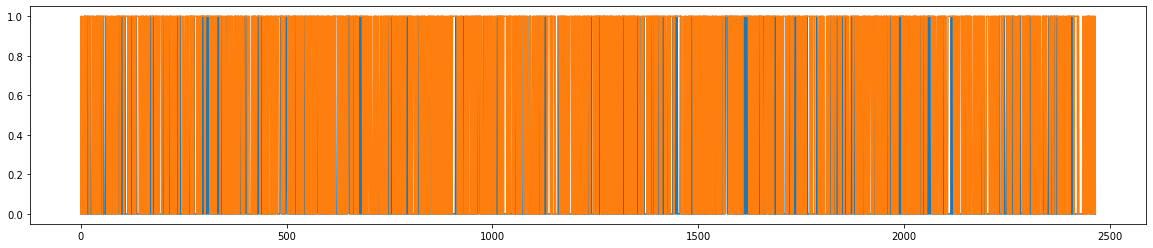

In [292]:
plt.figure(figsize = (20,4))
plt.plot(y_test)
plt.plot(pocket_prediction)
cm = confusion_matrix(y_test[:200], pocket_prediction[:200])
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test[:200], pocket_prediction[:200])
print("\n Classification Report: \n", cr)
print("Testing Accuracy: ", 100 - np.mean(np.abs(y_test - pocket_prediction)) * 100, "%")
print("Training Accuracy: ", 100 - np.mean(np.abs(y_train - pocket_prediction_train)) * 100, "%")

# QDA


In [272]:
class_0 = []
class_1 = []

print("X_train: ",X_train.dtype)
for i in range(0,X_train.shape[0]):
    if y_train[i] == 1:
        class_0.append((X_train[i]))
    else:
        class_1.append((X_train[i]))
class_0 = np.asarray(class_0)
print("Class 0:",class_0.shape)
class_1 = np.asarray(class_1)
print("Class 1:",class_1.shape)

train = np.concatenate((class_0, class_1), axis=0)

X_train:  float64
Class 0: (1414, 6)
Class 1: (8450, 6)


In [273]:
qda = QDA()
qda.train(train)
qda_prediction = qda.use(X_test)
qda_prediction_train = qda.use(X_train)


In
sigma:  (6, 6)
In
sigma:  (6, 6)
In
sigma:  (6, 6)
In
sigma:  (6, 6)



 Confusion Matrix: 
 [[1154  818]
 [ 127  367]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.59      0.71      1972
           1       0.31      0.74      0.44       494

    accuracy                           0.62      2466
   macro avg       0.61      0.66      0.57      2466
weighted avg       0.78      0.62      0.65      2466

Testing Accuracy:  51.16662029390465 %
Training Accuracy:  54.9317843515279 %


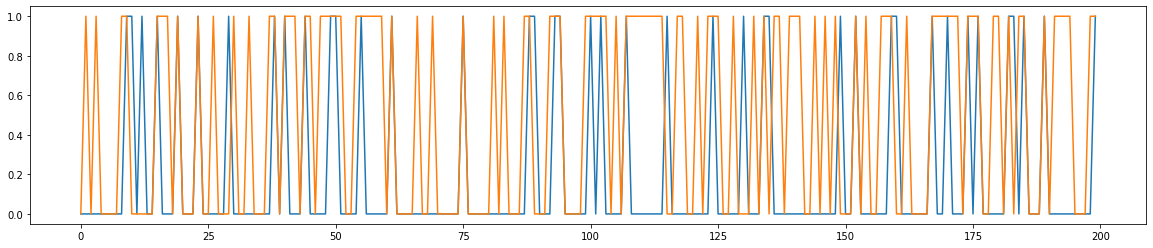

In [274]:
plt.figure(figsize = (20,4))
plt.plot(y_test[:200])
plt.plot(qda_prediction[:200])
cm = confusion_matrix(y_test, qda_prediction)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test, qda_prediction)
print("\n Classification Report: \n", cr)
print("Testing Accuracy: ", 100 - np.mean(np.abs(y_test - qda_prediction)) * 100, "%")
print("Training Accuracy: ", 100 - np.mean(np.abs(y_train - qda_prediction_train)) * 100, "%")

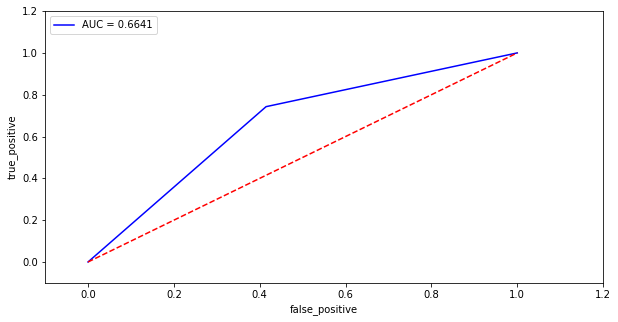

In [275]:
false_positive, true_positive, thresholds = roc_curve(y_test, qda_prediction)
roc_auc = auc(false_positive, true_positive)
plt.figure(figsize = (10,5))
plt.plot(false_positive, true_positive, 'b',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='upper left')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('true_positive')
plt.xlabel('false_positive')
plt.show()

# LDA


In [276]:
class_0 = []
class_1 = []
# print("X_train: ",X_train.shape[0])
for i in range(0,X_train.shape[0]):
    if y_train[i] == 1:
        class_0.append((X_train[i]))
    else:
        class_1.append((X_train[i]))
        
class_0 = np.asarray(class_0)
print("Class 0:",class_0.shape)
class_1 = np.asarray(class_1)
print("Class 1:",class_1.shape)

train = np.concatenate((class_0, class_1), axis=0)

Class 0: (1414, 6)
Class 1: (8450, 6)


In [277]:
lda = LDA()
lda.train(train)
lda_prediction =lda.use(X_test)
lda_prediction_train =lda.use(X_train)

mu:  [ 1.41052500e-02  5.94030101e-01 -2.08670196e-05 -2.84543037e-05
 -6.81026177e-05 -9.32264080e-05]
mu:  [-2.36033413e-03 -9.94033803e-02  3.49183027e-06  4.76146573e-06
  1.13961067e-05  1.56002534e-05]
sigma:  [[ 2.33914944e-03  8.72352103e-02 -5.62050274e-07 -8.09648068e-07
  -1.95322099e-06 -2.63375752e-06]
 [ 8.72352103e-02  4.61785322e+00 -2.18561865e-05 -2.98659915e-05
  -7.67566913e-05 -1.06441029e-04]
 [-5.62050274e-07 -2.18561865e-05  3.28626028e-09  3.00835952e-09
  -1.51945107e-09  1.99223122e-08]
 [-8.09648068e-07 -2.98659915e-05  3.00835952e-09  3.31095608e-09
  -2.24350713e-09  1.97489973e-08]
 [-1.95322099e-06 -7.67566913e-05 -1.51945107e-09 -2.24350713e-09
   7.78128394e-06  3.33185721e-07]
 [-2.63375752e-06 -1.06441029e-04  1.99223122e-08  1.97489973e-08
   3.33185721e-07  2.09365868e-05]]
sigma:  0.14334955393349555
sigma:  0.8566504460665044



 Confusion Matrix: 
 [[1972    0]
 [ 493    1]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1972
           1       1.00      0.00      0.00       494

    accuracy                           0.80      2466
   macro avg       0.90      0.50      0.45      2466
weighted avg       0.84      0.80      0.71      2466

Testing Accuracy:  79.94325421021924 %
Training Accuracy:  85.58549969775484 %


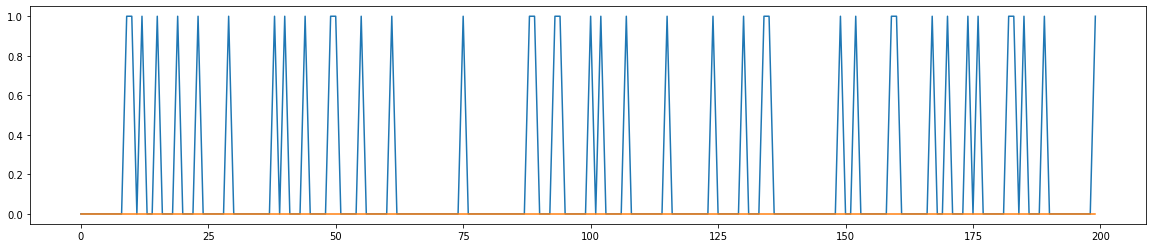

In [278]:
plt.figure(figsize = (20,4))
plt.plot(y_test[:200])
plt.plot(lda_prediction[:200])
cm = confusion_matrix(y_test, lda_prediction)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test, lda_prediction)
print("\n Classification Report: \n", cr)
print("Testing Accuracy: ", 100 - np.mean(np.abs(y_test - lda_prediction)) * 100, "%")
print("Training Accuracy: ", 100 - np.mean(np.abs(y_train - lda_prediction_train)) * 100, "%")

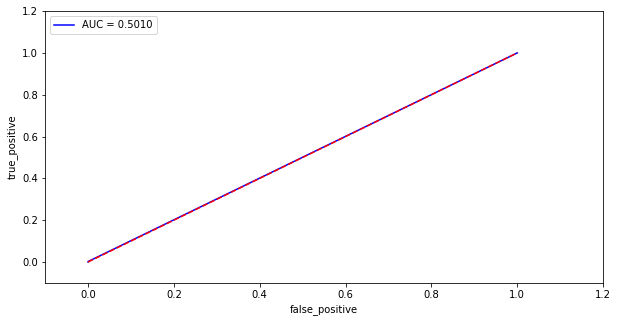

In [279]:
false_positive, true_positive, thresholds = roc_curve(y_test, lda_prediction)
roc_auc = auc(false_positive, true_positive)

plt.figure(figsize = (10,5))
plt.plot(false_positive, true_positive, 'b',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='upper left')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('true_positive')
plt.xlabel('false_positive')
plt.show()

# Logistic Regression



In [280]:
lr = LogisticRegression()
lr.train(X_train,y_train)
logistic_prediction = lr.use(X_test)
logistic_prediction = np.argmax(logistic_prediction, 1)
logistic_prediction_train = lr.use(X_train)
logistic_prediction_train = np.argmax(logistic_prediction_train, 1)

Confusion Matrix: 
 [[1094  878]
 [ 327  167]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.55      0.64      1972
           1       0.16      0.34      0.22       494

    accuracy                           0.51      2466
   macro avg       0.46      0.45      0.43      2466
weighted avg       0.65      0.51      0.56      2466

Testing Accuracy:  54.569262817793195 %
Training Accuracy:  55.4452105816723 %


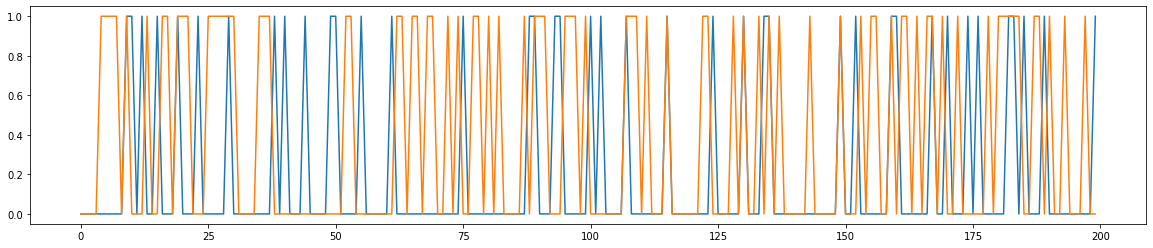

In [281]:
plt.figure(figsize = (20,4))
plt.plot(y_test[:200])
plt.plot(logistic_prediction[:200])
cm = confusion_matrix(y_test,logistic_prediction)
print("Confusion Matrix: \n", cm)

cr = classification_report(y_test,logistic_prediction)
print("\nClassification Report: \n", cr)
print("Testing Accuracy: ", 100 - np.mean(np.abs(y_test - logistic_prediction)) * 100, "%")
print("Training Accuracy: ", 100 - np.mean(np.abs(y_train - logistic_prediction_train)) * 100, "%")

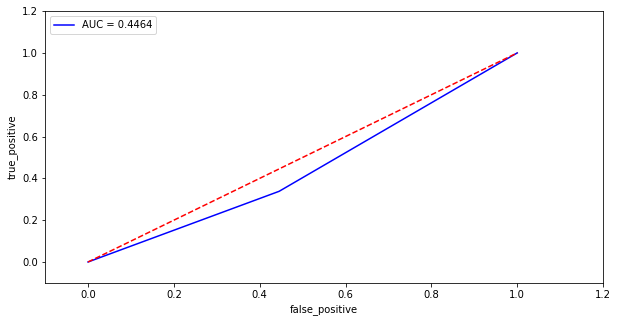

In [282]:
false_positive, true_positive, thresholds = roc_curve(y_test, logistic_prediction)
roc_auc = auc(false_positive, true_positive)
plt.figure(figsize = (10,5))
plt.plot(false_positive, true_positive, 'b',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='upper left')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('true_positive')
plt.xlabel('false_positive')
plt.show()

# Conclusions

Summarize your work here. 
Which classifier do you think the best? 
- According to experiments carried out, LDA performed well in comparision to all the algorithms. The F1 score and the training and testing accuracy achieved was also good. There was no problem of the overfitting.
- The main challenge that faced during the assignment was to solve the error as the determinant of the matrix was zero so inverse of that matrix is not possible. So to solve that error, task was to remove the columns with very high values of the covariance matrix. Due to this I was not able to solve the QDA and LDA algorithms. Other challenging task was to train the pocket algorithm since due to large amount of data and higher feature values it took long time for training so debugging in pocket algorithm was challenging task.


# References
1. Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). 
2. Brownlee, Jason. “Linear Discriminant Analysis for Machine Learning.” Machine Learning Mastery, 12 Aug. 2019, https://machinelearningmastery.com/linear-discriminant-analysis-for-machine-learning/.
3. “Classification Report¶.” Classification Report - Yellowbrick v1.0.1 Documentation, https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html.
4. Sustainable Development Solutions Network. “World Happiness Report.” Kaggle, 14 June 2017, https://www.kaggle.com/unsdsn/world-happiness.

# Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
      




Ordinal dataset used for classification is **World Happiness Dataset[4]** The World Happiness Report is a landmark survey of the state of global happiness.The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale.

In [293]:
df_ordinal_class = pd.read_csv('2015.csv')
df_ordinal_class.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [294]:
df_ordinal_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [295]:
df_ordinal_class.groupby('Region')['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)'].mean().sort_values(by="Happiness Score", ascending=False)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita)
Region,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880
North America,10.000000,7.273000,0.036960,1.360400
Western Europe,29.523810,6.689619,0.037625,1.298596
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815
Eastern Asia,64.500000,5.626167,0.037225,1.151780
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438
Southeastern Asia,81.222222,5.317444,0.042691,0.789054
Southern Asia,113.142857,4.580857,0.032161,0.560486


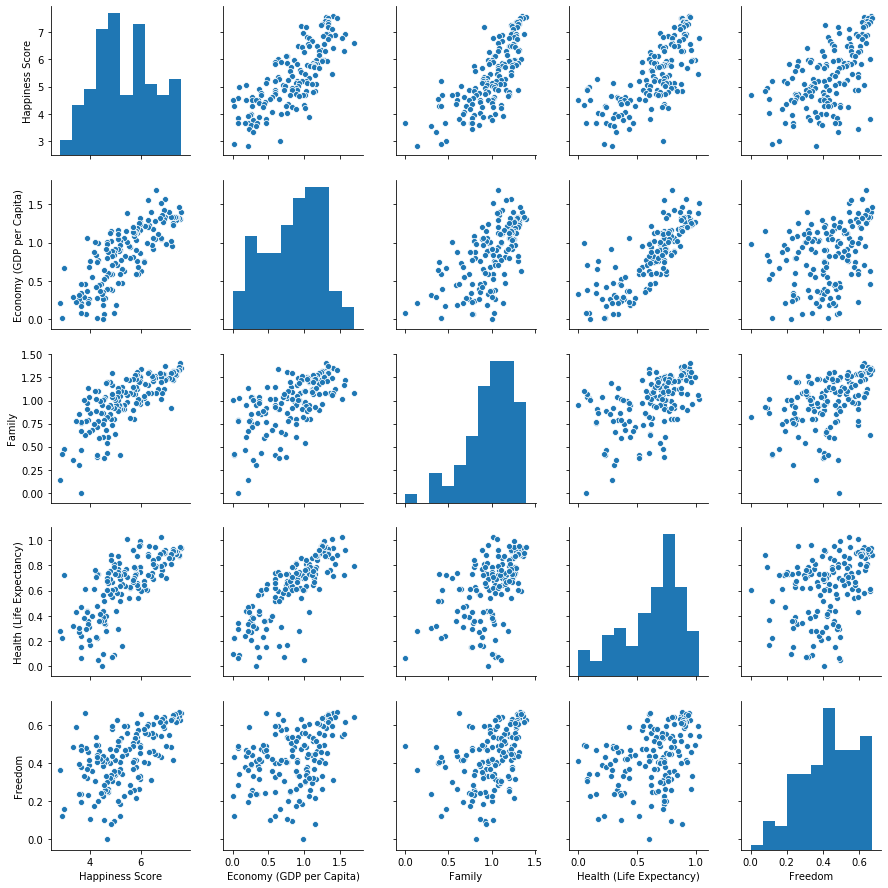

In [296]:
sns.pairplot(df_ordinal_class[['Happiness Score','Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom']])

Text(0.5, 1, 'Heatmap for the Features')

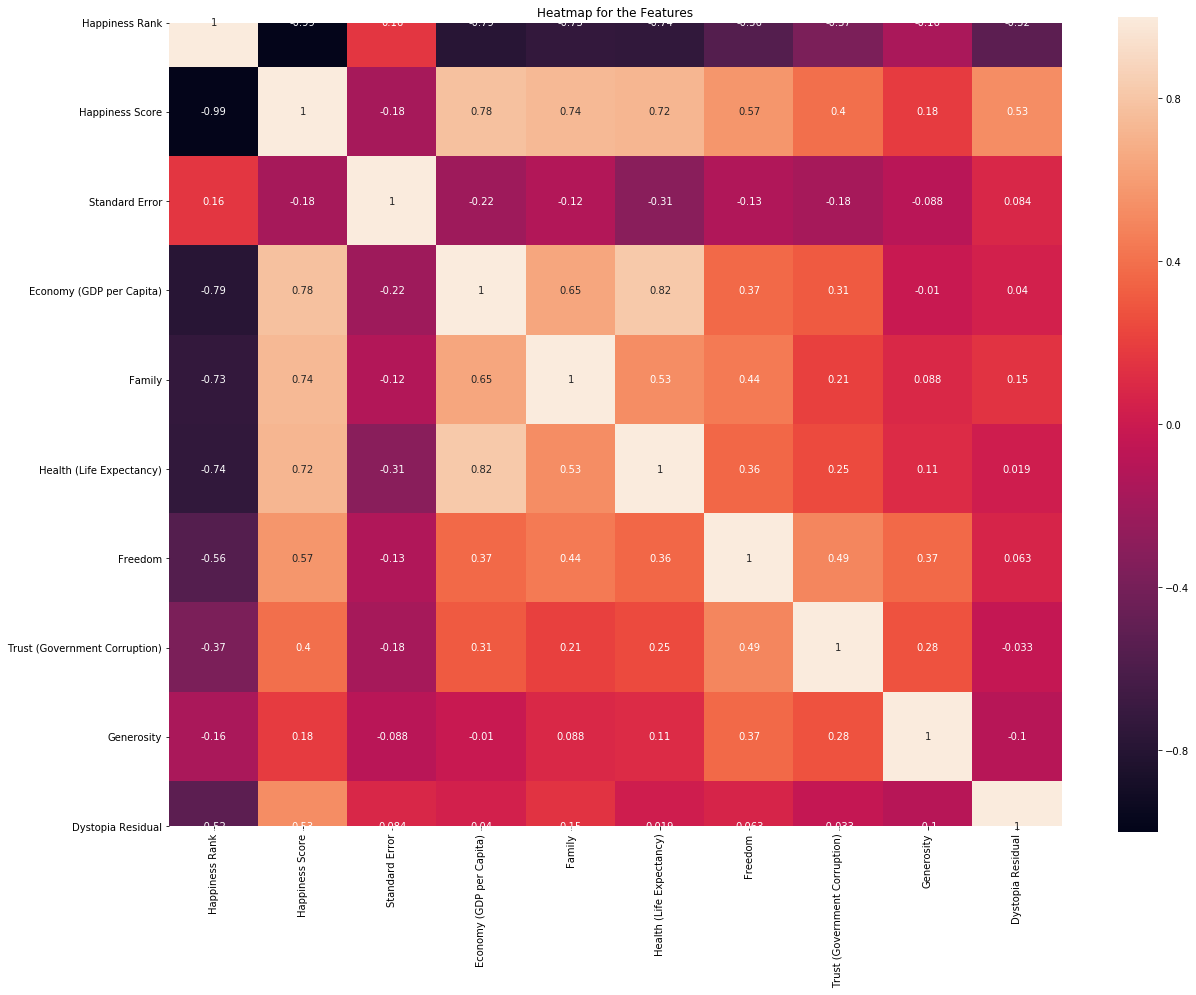

In [297]:
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(df_ordinal_class.corr(),vmin=-1,vmax=1,annot=True,cbar = True, square = True)
plt.title("Heatmap for the Features")

[Text(0, 0.5, 'Happiness Score'), Text(0.5, 0, 'Country')]

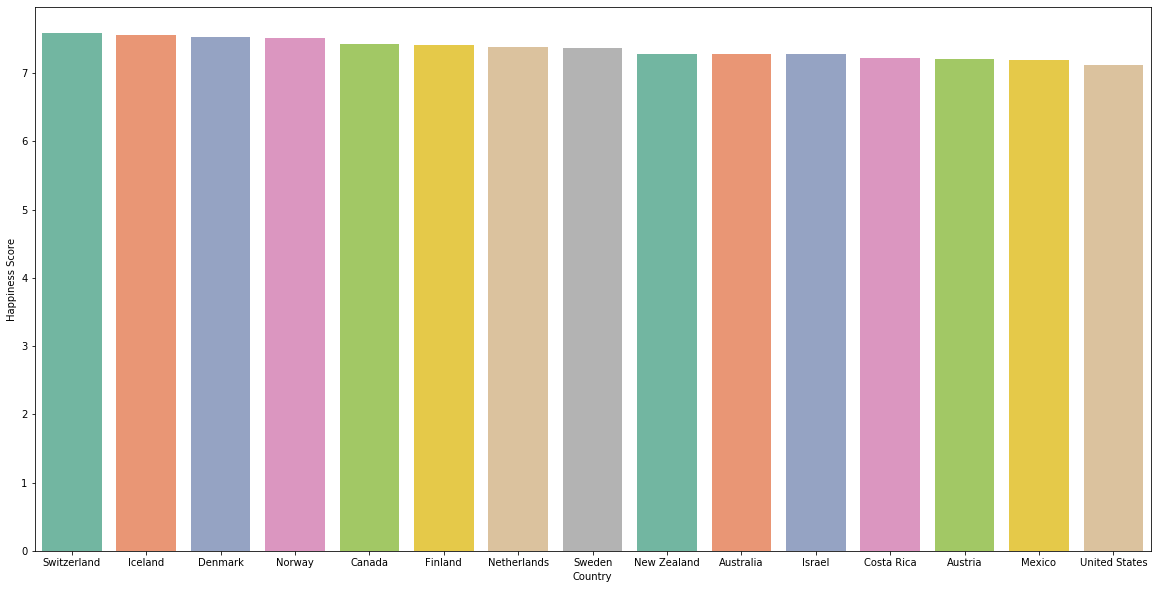

In [298]:
plt.figure(figsize=(20,10))
topCountry=df_ordinal_class.sort_values(by=['Happiness Rank'],ascending=True).head(15)
ax=sns.barplot(x='Country',y='Happiness Score', data=topCountry, palette = 'Set2')
ax.set(xlabel='Country', ylabel='Happiness Score')

In [299]:
df_ordinal_class = df_ordinal_class.drop(['Happiness Rank', 'Country', 'Region'], axis=1)
# y_ordinal_target = df_ordinal_class['Happiness Score']

In [300]:
X_ordinal_data = df_ordinal_class.iloc[:,0:1]
X_ordinal_data

,Happiness Score
0,7.587
1,7.561
2,7.527
3,7.522
4,7.427
5,7.406
6,7.378
7,7.364
8,7.286
9,7.284


In [302]:
X_ordinal_data = df_ordinal_class.iloc[:,1:]
T_ordinal_label = df_ordinal_class.iloc[:,0:1]

split_feature, split_label = partition(X_ordinal_data, T_ordinal_label)
X_train_ordinal, X_test_ordinal = [i.values for i in split_feature]
y_train_ordinal, y_test_ordinal = [j.values for j in split_label]
print("Xtrain: ",X_train_ordinal.shape)
print("y_train: ",y_train_ordinal.shape)
print("Xtrain: ",X_test_ordinal.shape)
print("y_train: ",y_test_ordinal.shape)

Xtrain:  (126, 8)
y_train:  (126, 1)
Xtrain:  (32, 8)
y_train:  (32, 1)


# Logistic Regression


<Figure size 1440x1080 with 0 Axes>

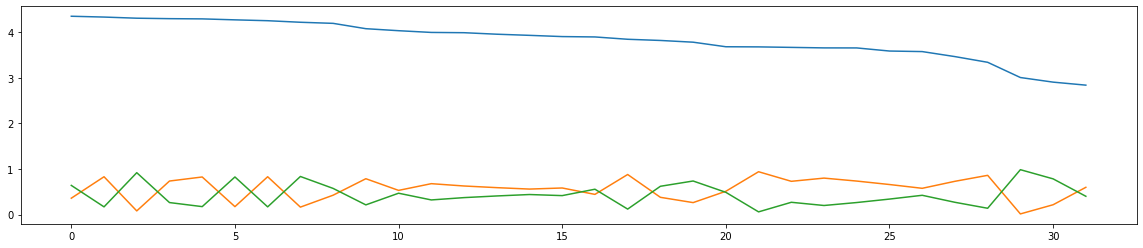

In [301]:
lr_ordinal = LogisticRegression()
lr_ordinal.train(X_train_ordinal,y_train_ordinal)
logistic_prediction_ordinal = lr_ordinal.use(X_test_ordinal)

#########################################################
plt.clf()
plt.figure(figsize = (20,4))
plt.plot(y_test_ordinal)
plt.plot(logistic_prediction_ordinal)

Logistic Regression doesn’t perform well when feature space is too large. It also doesn't handle large number of categorical features. Here there were many classes for the world happiness data, I have only implemented Logistic Regression since it handles the Multi class classification where as the computation of other algorithm are very complex for implementation.
Logistic Regression relies on transformations for non-linear features. Also, it has convenient probability scores for observations of the output.


**[OPT 2] Partition your data into five sets.**

- Here all the 4 algorithms are performed aon every training and testing set. So there are 20 results of the given experiment.
- The analysis of this experiments concludes that on dividing the dataset in 5 sets. Then, performing training and testing on every individual sets Pocket algorithm and Logistic regression doesn't perform well whereas LDA and QDA performs well on testing data. There would be some cases which might cause overfitting in QDA and LDA. So, partitioning data into five sets is acctually not a good idea for all the algorithms.


In [156]:
df_class = df_classification_new
df_class_1 = df_class.iloc[0:2466,:]
df_class_2 = df_class.iloc[2466:4932,:]
df_class_3 = df_class.iloc[4932:7398,:]
df_class_4 = df_class.iloc[7398:9864,:]
df_class_5 = df_class.iloc[9864:,:]

<Br>**Training Data:** Second - Fifth Set
<Br>**Testing Data:** First Set

In [157]:
X_data_1 = df_class_1.iloc[:,0:6]
T_label_1 = df_class_1.iloc[:,6:]
X_train_1 = pd.concat([df_class_2,df_class_3,df_class_4,df_class_5])
y_train_1 = X_train_1.iloc[:,6:]
X_train_1 = X_train_1.drop('Revenue',axis=1)
X_test_1 = X_data_1
y_test_1 = T_label_1
y_train_1 = np.asarray(y_train_1)
X_train_1 = np.asarray(X_train_1)
X_test_1 = np.asarray(X_test_1)
y_test_1 = np.asarray(y_test_1)

# Pocket Algorithm


i:  0
W pocket:  (6,)
w_pocket:  (6,)
shape of X:  [[-7.97412233e-01 -7.02375843e-01  3.10951888e+00  2.75144986e+00
  -8.63328895e-01 -7.43673041e-01]
 [-7.55370487e-01 -6.47198460e-01 -4.57122601e-01  9.34255682e-01
  -8.63328895e-01 -4.24789765e-01]
 [-7.97412233e-01 -7.02375843e-01  3.10951888e+00  2.75144986e+00
   2.57951575e+00 -1.05906489e-01]
 ...
 [-2.92911286e-01 -5.32360533e-01  9.15914769e-02 -1.84017667e-01
   1.71880459e+00 -1.05906489e-01]
 [ 2.90226138e+00  2.32300947e+00 -3.56936034e-01 -6.05838263e-01
  -2.61773467e-03  8.50743338e-01]
 [-1.66786049e-01  4.46741855e-02 -4.57122601e-01 -6.69150944e-01
  -8.63328895e-01 -4.24789765e-01]]
y:  [-0.32342884 -0.10816741 -0.27688877 ... -0.02553962  0.28347328
  0.03574204]

 Confusion Matrix: 
 [[134  59]
 [  0   7]]

 Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.69      0.82       193
           1       0.11      1.00      0.19         7

    accuracy      

<Figure size 1440x1080 with 0 Axes>

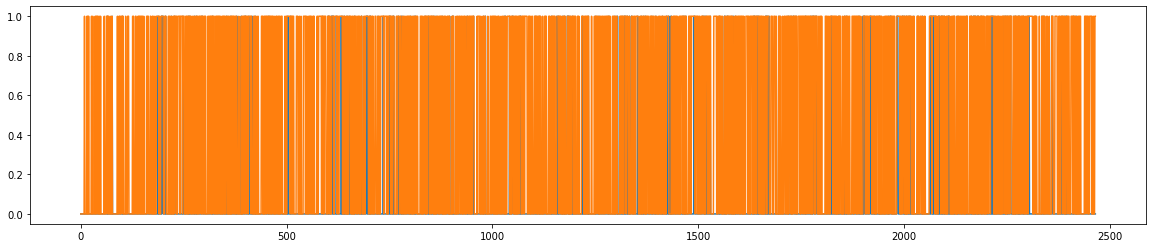

In [161]:
pa_1 = PocketAlgorithm()
pa_1.train(X_train_1, y_train_1)

pocket_prediction_1 = pa_1.use(X_test_1)
pocket_prediction_1 = np.sign(pocket_prediction_1)
for i in range(pocket_prediction_1.shape[0]):
    if pocket_prediction_1[i]==-1:
        pocket_prediction_1[i] = 0

plt.clf()
plt.figure(figsize = (20,4))
plt.plot(y_test_1)
plt.plot(pocket_prediction_1)
cm = confusion_matrix(y_test_1, pocket_prediction_1)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test_1, pocket_prediction_1)
print("\n Classification Report: \n", cr)
print("Accuracy: ", 100 - np.mean(np.abs(y_test_1 - pocket_prediction_1)) * 100, "%")

# QDA


In
sigma:  (6, 6)
In
sigma:  (6, 6)

 Confusion Matrix: 
 [[1951  279]
 [ 193   43]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      2230
           1       0.13      0.18      0.15       236

    accuracy                           0.81      2466
   macro avg       0.52      0.53      0.52      2466
weighted avg       0.84      0.81      0.82      2466

Accuracy:  79.8715244272635 %
Receiver operating characteristic score: 0.528545641103595


<Figure size 1440x1080 with 0 Axes>

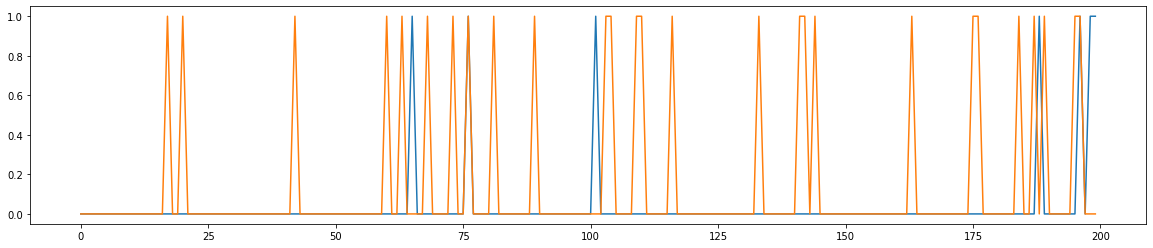

In [162]:
class_0_1 = []
class_1_1 = []
for i in range(0,X_train_1.shape[0]):
#     print("y_train:",y_train_1[i])
    if y_train_1[i] == 1:
        class_0_1.append((X_train_1[i]))
    else:
        class_1_1.append((X_train_1[i]))
class_0_1 = np.asarray(class_0_1)
class_1_1 = np.asarray(class_1_1)

train_1 = np.concatenate((class_0_1, class_1_1), axis=0)

#########################################################
qda_1 = QDA()
qda_1.train(train_1)
qda_prediction_1 = qda_1.use(X_test_1)

#########################################################
plt.clf()
plt.figure(figsize = (20,4))
plt.plot(y_test_1[:200])
plt.plot(qda_prediction_1[:200])
cm = confusion_matrix(y_test_1, qda_prediction_1)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test_1, qda_prediction_1)
print("\n Classification Report: \n", cr)
print("Accuracy: ", 100 - np.mean(np.abs(y_test_1 - qda_prediction_1)) * 100, "%")

##########################################################

false_positive_1, true_positive_1, thresholds = roc_curve(y_test_1, qda_prediction_1)
roc_auc = auc(false_positive_1, true_positive_1)
print("Receiver operating characteristic score:",roc_auc)

# LDA


mu:  [ 1.44657831e-02  5.85719473e-01 -1.65610488e-05 -2.25853341e-05
 -1.17702519e-04 -2.82730151e-04]
mu:  [-2.42066476e-03 -9.80127023e-02  2.77128082e-06  3.77936833e-06
  1.96960192e-05  4.73112939e-05]
sigma:  [[ 2.46580907e-03  9.13174923e-02 -4.83793111e-07 -6.93030757e-07
  -6.51914828e-06 -1.31513788e-05]
 [ 9.13174923e-02  4.52248567e+00 -1.85379421e-05 -2.52846562e-05
  -2.33151656e-04 -4.83380878e-04]
 [-4.83793111e-07 -1.85379421e-05  2.31615369e-09  2.13357026e-09
   1.54128659e-11  2.27054466e-08]
 [-6.93030757e-07 -2.52846562e-05  2.13357026e-09  2.35534685e-09
  -2.19804781e-10  2.32255022e-08]
 [-6.51914828e-06 -2.33151656e-04  1.54128659e-11 -2.19804781e-10
   6.30856768e-06  6.07045901e-07]
 [-1.31513788e-05 -4.83380878e-04  2.27054466e-08  2.32255022e-08
   6.07045901e-07  1.89943736e-05]]
sigma:  0.14334955393349555
sigma:  0.8566504460665044

 Confusion Matrix: 
 [[2230    0]
 [ 236    0]]

 Classification Report: 
               precision    recall  f1-score   

C:\Users\Asus\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 1440x1080 with 0 Axes>

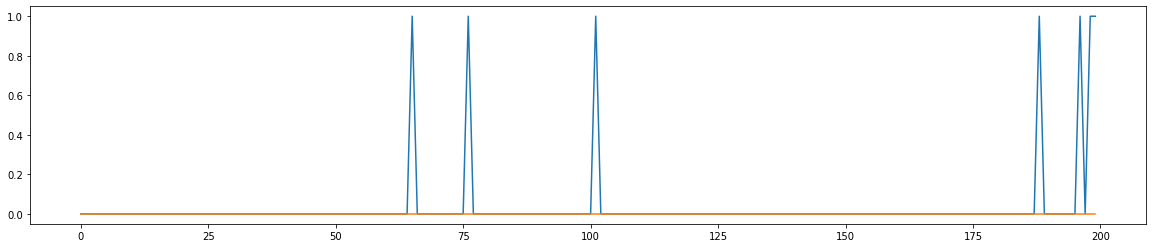

In [163]:
class_0_1 = []
class_1_1 = []
for i in range(0,X_train_1.shape[0]):
#     print("y_train:",y_train_1[i])
    if y_train_1[i] == 1:
        class_0_1.append((X_train_1[i]))
    else:
        class_1_1.append((X_train_1[i]))
class_0_1 = np.asarray(class_0_1)
class_1_1 = np.asarray(class_1_1)

train_1 = np.concatenate((class_0_1, class_1_1), axis=0)

#########################################################
lda_1 = LDA()
lda_1.train(train_1)
lda_prediction_1 = lda_1.use(X_test_1)

#########################################################
plt.clf()
plt.figure(figsize = (20,4))
plt.plot(y_test_1[:200])
plt.plot(lda_prediction_1[:200])
cm = confusion_matrix(y_test_1, lda_prediction_1)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test_1, lda_prediction_1)
print("\n Classification Report: \n", cr)
print("Accuracy: ", 100 - np.mean(np.abs(y_test_1 - lda_prediction_1)) * 100, "%")

##########################################################

false_positive_1, true_positive_1, thresholds = roc_curve(y_test_1, lda_prediction_1)
roc_auc = auc(false_positive_1, true_positive_1)
print("Receiver operating characteristic score:",roc_auc)

# Logistic regression



 Confusion Matrix: 
 [[1184 1046]
 [ 157   79]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.53      0.66      2230
           1       0.07      0.33      0.12       236

    accuracy                           0.51      2466
   macro avg       0.48      0.43      0.39      2466
weighted avg       0.81      0.51      0.61      2466

Accuracy:  53.54130037117943 %
Receiver operating characteristic score: 0.4328437333738694


<Figure size 1440x1080 with 0 Axes>

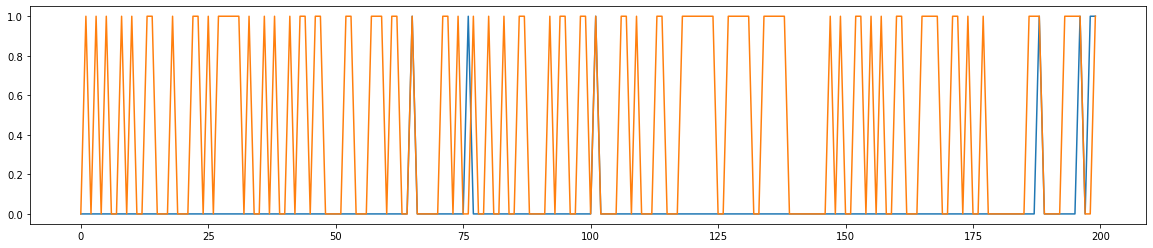

In [164]:
lr_1 = LogisticRegression()
lr_1.train(X_train_1,y_train_1)
logistic_prediction_1 = lr_1.use(X_test_1)
logistic_prediction_1 = np.argmax(logistic_prediction_1, 1)

#########################################################
plt.clf()
plt.figure(figsize = (20,4))
plt.plot(y_test_1[:200])
plt.plot(logistic_prediction_1[:200])
cm = confusion_matrix(y_test_1, logistic_prediction_1)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test_1, logistic_prediction_1)
print("\n Classification Report: \n", cr)
print("Accuracy: ", 100 - np.mean(np.abs(y_test_1 - logistic_prediction_1)) * 100, "%")

##########################################################

false_positive_1, true_positive_1, thresholds = roc_curve(y_test_1, logistic_prediction_1)
roc_auc = auc(false_positive_1, true_positive_1)
print("Receiver operating characteristic score:",roc_auc)

<Br>**Training Data:** First and Third - Fifth Set
<Br>**Testing Data:** Second Set

In [165]:
X_data_2 = df_class_2.iloc[:,0:6]
T_label_2 = df_class_2.iloc[:,6:]

X_train_2 = pd.concat([df_class_1,df_class_3,df_class_4,df_class_5])
y_train_2 = X_train_2.iloc[:,6:]
X_train_2 = X_train_2.drop('Revenue',axis=1)
X_test_2 = X_data_2
y_test_2 = T_label_2
y_train_2 = np.asarray(y_train_2)
X_train_2 = np.asarray(X_train_2)
X_test_2 = np.asarray(X_test_2)
y_test_2 = np.asarray(y_test_2)

# Pocket Algorithm

i:  0
W pocket:  (6,)
w_pocket:  (6,)
shape of X:  [[-0.44813459 -0.16307283 -0.51262268 -0.64641743 -0.50405391 -0.64085443]
 [-0.69755059 -0.71141003  0.29350315  0.64782426 -0.50405391  1.68737003]
 [ 0.67423737  0.53768231 -0.51262268 -0.6141923  -0.50405391 -0.64085443]
 ...
 [-0.63519659 -0.68720756  2.17446341  2.3837516  -0.50405391 -0.38216282]
 [ 0.45599838 -0.2540842  -0.25670971 -0.46812904  1.67282339 -0.38216282]
 [-0.63519659 -0.61119668 -0.51262268 -0.28690585 -0.93942937 -0.89954604]]
y:  [ 0.0160861  -0.02749433  0.03009058 ... -0.13399376  0.03351655
 -0.00065819]

 Confusion Matrix: 
 [[ 753 1451]
 [  11  251]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.34      0.51      2204
           1       0.15      0.96      0.26       262

    accuracy                           0.41      2466
   macro avg       0.57      0.65      0.38      2466
weighted avg       0.90      0.41      0.48      2466

Accurac

<Figure size 1440x1080 with 0 Axes>

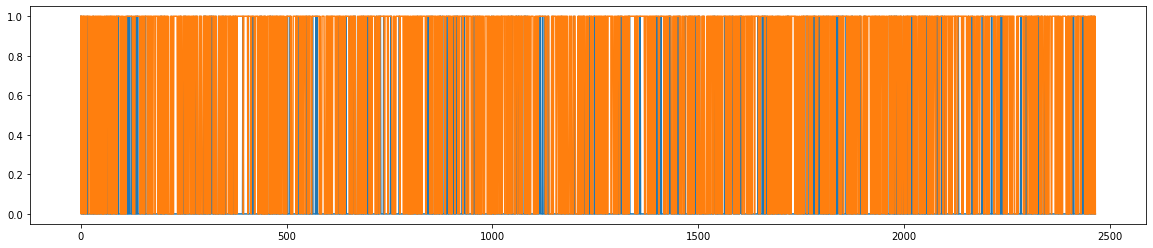

In [201]:
pa_2 = PocketAlgorithm()
pa_2.train(X_train_2, y_train_2)

pocket_prediction_2 = pa_2.use(X_test_2)
pocket_prediction_2 = np.sign(pocket_prediction_2)
for i in range(pocket_prediction_2.shape[0]):
    if pocket_prediction_2[i]==-1:
        pocket_prediction_2[i] = 0
# plt.plot(pocket_prediction)
plt.clf()
plt.figure(figsize = (20,4))
plt.plot(y_test_2)
plt.plot(pocket_prediction_2)
cm = confusion_matrix(y_test_2, pocket_prediction_2)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test_2, pocket_prediction_2)
print("\n Classification Report: \n", cr)
print("Accuracy: ", 100 - np.mean(np.abs(y_test_2 - pocket_prediction_2)) * 100, "%")

# QDA

In
sigma:  (6, 6)
In
sigma:  (6, 6)

 Confusion Matrix: 
 [[2204    0]
 [ 262    0]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      2204
           1       0.00      0.00      0.00       262

    accuracy                           0.89      2466
   macro avg       0.45      0.50      0.47      2466
weighted avg       0.80      0.89      0.84      2466

Accuracy:  89.37550689375507 %
Receiver operating characteristic score: 0.5


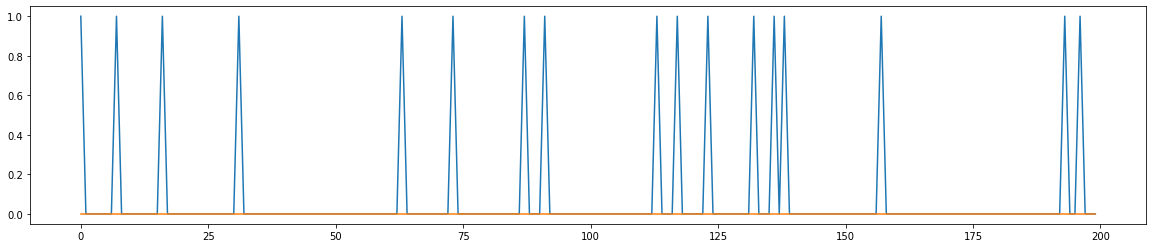

In [167]:
class_0_2 = []
class_1_2 = []
for i in range(0,X_train_2.shape[0]):
    if y_train[i] == 1:
        class_0_2.append((X_train_2[i]))
    else:
        class_1_2.append((X_train_2[i]))
class_0_2 = np.asarray(class_0_2)
class_1_2 = np.asarray(class_1_2)

train_2 = np.concatenate((class_0_2, class_1_2), axis=0)

#########################################################
qda_2 = QDA()
qda_2.train(train_2)
qda_prediction_2 = qda_2.use(X_test_2)

#########################################################
# plt.clf()
plt.figure(figsize = (20,4))
plt.plot(y_test_2[:200])
plt.plot(qda_prediction_2[:200])
cm = confusion_matrix(y_test_2, qda_prediction_2)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test_2, qda_prediction_2)
print("\n Classification Report: \n", cr)
print("Accuracy: ", 100 - np.mean(np.abs(y_test_2 - qda_prediction_2)) * 100, "%")

##########################################################

false_positive_2, true_positive_2, thresholds = roc_curve(y_test_2, qda_prediction_2)
roc_auc_2 = auc(false_positive_2, true_positive_2)
print("Receiver operating characteristic score:",roc_auc_2)

# LDA

mu:  [ 1.70548126e-02  6.93171153e-01 -1.69099891e-05 -2.32567934e-05
 -1.15171184e-04  7.24253937e-06]
mu:  [-2.85390593e-03 -1.15993374e-01  2.82967155e-06  3.89172851e-06
  1.92724324e-05 -1.21194682e-06]
sigma:  [[ 2.44500871e-03  9.15579179e-02 -4.96970032e-07 -7.12333185e-07
  -5.64467586e-06 -1.18886357e-05]
 [ 9.15579179e-02  4.57097691e+00 -1.92206309e-05 -2.64280721e-05
  -2.26868734e-04 -4.19004252e-04]
 [-4.96970032e-07 -1.92206309e-05  2.57091893e-09  2.35046426e-09
  -6.50876187e-10  1.50588319e-08]
 [-7.12333185e-07 -2.64280721e-05  2.35046426e-09  2.57342192e-09
  -7.51936720e-10  1.51372243e-08]
 [-5.64467586e-06 -2.26868734e-04 -6.50876187e-10 -7.51936720e-10
   6.52754293e-06  6.63456257e-07]
 [-1.18886357e-05 -4.19004252e-04  1.50588319e-08  1.51372243e-08
   6.63456257e-07  1.82450694e-05]]
sigma:  0.14334955393349555
sigma:  0.8566504460665044

 Confusion Matrix: 
 [[2202    2]
 [ 262    0]]

 Classification Report: 
               precision    recall  f1-score   

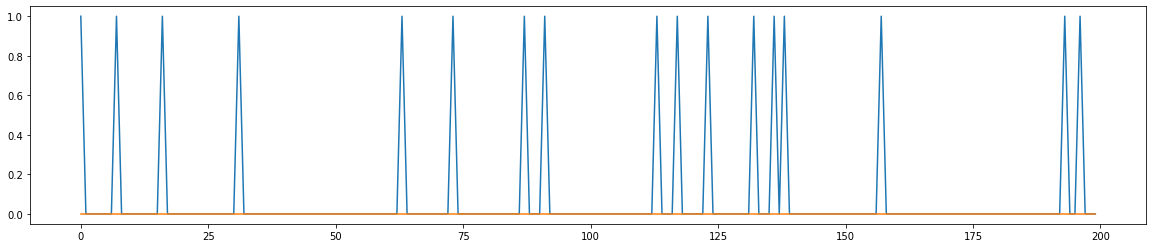

In [168]:
class_0_2 = []
class_1_2 = []
for i in range(0,X_train_2.shape[0]):
    if y_train_2[i] == 1:
        class_0_2.append((X_train_2[i]))
    else:
        class_1_2.append((X_train_2[i]))
class_0_2 = np.asarray(class_0_2)
class_1_2 = np.asarray(class_1_2)

train_2 = np.concatenate((class_0_2, class_1_2), axis=0)

#########################################################
lda_2 = LDA()
lda_2.train(train_2)
lda_prediction_2 = lda_2.use(X_test_2)

#########################################################
# plt.clf()
plt.figure(figsize = (20,4))
plt.plot(y_test_2[:200])
plt.plot(lda_prediction_2[:200])
cm = confusion_matrix(y_test_2, lda_prediction_2)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test_2, lda_prediction_2)
print("\n Classification Report: \n", cr)
print("Accuracy: ", 100 - np.mean(np.abs(y_test_2 - lda_prediction_2)) * 100, "%")

##########################################################

false_positive_2, true_positive_2, thresholds = roc_curve(y_test_2, lda_prediction_2)
roc_auc_2 = auc(false_positive_2, true_positive_2)
print("Receiver operating characteristic score:",roc_auc_2)

# Logistic regression



 Confusion Matrix: 
 [[1172 1032]
 [ 213   49]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.53      0.65      2204
           1       0.05      0.19      0.07       262

    accuracy                           0.50      2466
   macro avg       0.45      0.36      0.36      2466
weighted avg       0.76      0.50      0.59      2466

Accuracy:  54.85407708665918 %
Receiver operating characteristic score: 0.3593916681675233


<Figure size 1440x1080 with 0 Axes>

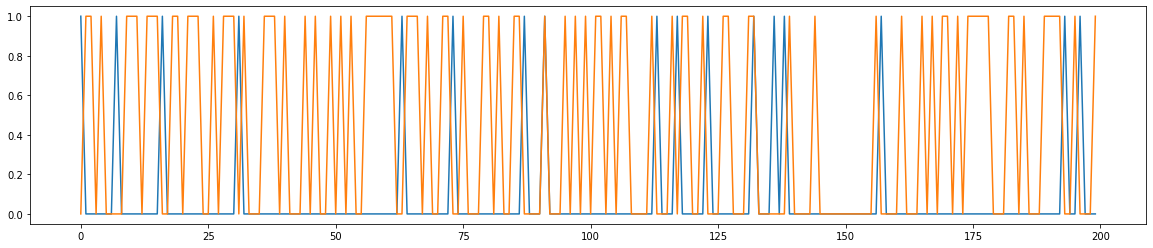

In [169]:
lr_2 = LogisticRegression()
lr_2.train(X_train_2,y_train_2)
logistic_prediction_2 = lr.use(X_test_2)
logistic_prediction_2 = np.argmax(logistic_prediction_2, 1)

#########################################################
plt.clf()
plt.figure(figsize = (20,4))
plt.plot(y_test_2[:200])
plt.plot(logistic_prediction_2[:200])
cm = confusion_matrix(y_test_2, logistic_prediction_2)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test_2, logistic_prediction_2)
print("\n Classification Report: \n", cr)
print("Accuracy: ", 100 - np.mean(np.abs(y_test_2 - logistic_prediction_2)) * 100, "%")

##########################################################

false_positive_2, true_positive_2, thresholds = roc_curve(y_test_2, logistic_prediction_2)
roc_auc = auc(false_positive_2, true_positive_2)
print("Receiver operating characteristic score:",roc_auc)

<Br>**Training Data:** First-Second and Fourth - Fifth Set
<Br>**Testing Data:** Third Set

In [170]:
X_data_3 = df_class_3.iloc[:,0:6]
T_label_3 = df_class_3.iloc[:,6:]

X_train_3 = pd.concat([df_class_1,df_class_2,df_class_4,df_class_5])
y_train_3 = X_train_3.iloc[:,6:]
X_train_3 = X_train_3.drop('Revenue',axis=1)
X_test_3 = X_data_3
y_test_3 = T_label_3
y_train_3 = np.asarray(y_train_3)
X_train_3 = np.asarray(X_train_3)
X_test_3 = np.asarray(X_test_3)
y_test_3 = np.asarray(y_test_3)

# Pocket Algorithm

i:  0
W pocket:  (6,)
w_pocket:  (6,)
shape of X:  [[-0.1139781  -0.22931933 -0.28934621 -0.49156192 -0.95951319 -0.0202254 ]
 [ 1.7308419   3.63711487 -0.16774022 -0.21058475 -0.54800719  0.45030131]
 [-0.62289396 -0.46998829 -0.4653632   0.25840878 -0.95951319 -0.49075211]
 ...
 [-0.5804843  -0.50439359 -0.4653632  -0.54816349 -0.95951319  0.21503796]
 [-0.43205051 -0.54687052  0.52473243  0.73226311 -0.54800719 -0.0202254 ]
 [-0.64409879 -0.58112447  0.06268779  0.13105526  0.27500482 -0.0202254 ]]
y:  [ 0.01127886  0.00983879 -0.00820661 ...  0.02210967 -0.0344217
 -0.00030747]

 Confusion Matrix: 
 [[ 736 1323]
 [  61  346]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.36      0.52      2059
           1       0.21      0.85      0.33       407

    accuracy                           0.44      2466
   macro avg       0.57      0.60      0.42      2466
weighted avg       0.81      0.44      0.49      2466

Accuracy

<Figure size 1440x1080 with 0 Axes>

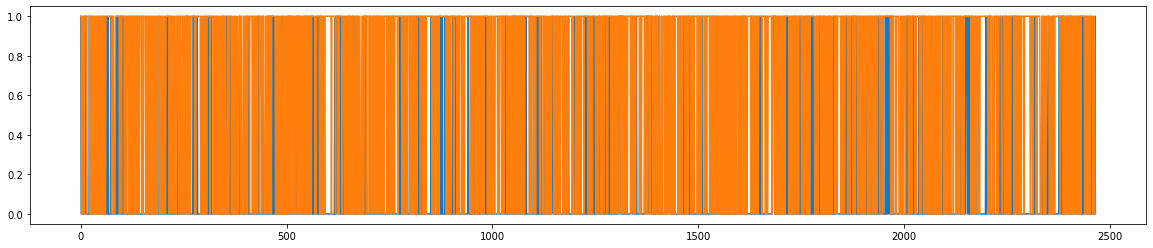

In [198]:
pa_3 = PocketAlgorithm()
pa_3.train(X_train_3, y_train_3)

pocket_prediction_3 = pa_3.use(X_test_3)
pocket_prediction_3 = np.sign(pocket_prediction_3)
for i in range(pocket_prediction_3.shape[0]):
    if pocket_prediction_3[i]==-1:
        pocket_prediction_3[i] = 0
# plt.plot(pocket_prediction)
plt.clf()
plt.figure(figsize = (20,4))
plt.plot(y_test_3)
plt.plot(pocket_prediction_3)
cm = confusion_matrix(y_test_3, pocket_prediction_3)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test_3, pocket_prediction_3)
print("\n Classification Report: \n", cr)
print("Accuracy: ", 100 - np.mean(np.abs(y_test_3 - pocket_prediction_3)) * 100, "%")

# QDA

In [ ]:
class_0_3 = []
class_1_3 = []
for i in range(0,X_train_3.shape[0]):
    if y_train_3[i] == 1:
        class_0_3.append((X_train_3[i]))
    else:
        class_1_3.append((X_train_3[i]))
class_0_3 = np.asarray(class_0_3)
class_1_3 = np.asarray(class_1_3)

train_3 = np.concatenate((class_0_3, class_1_3), axis=0)

#########################################################
qda_3 = QDA()
qda_3.train(train_3)
qda_prediction_3 = qda_3.use(X_test_3)

#########################################################

plt.figure(figsize = (20,4))
plt.plot(y_test_3[:200])
plt.plot(qda_prediction_3[:200])
cm = confusion_matrix(y_test_3, qda_prediction_3)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test_3, qda_prediction_3)
print("\n Classification Report: \n", cr)
print("Accuracy: ", 100 - np.mean(np.abs(y_test_3 - qda_prediction_3)) * 100, "%")

##########################################################

false_positive_3, true_positive_3, thresholds = roc_curve(y_test_3, qda_prediction_3)
roc_auc_3 = auc(false_positive_3, true_positive_3)
print("Receiver operating characteristic score:",roc_auc_3)

# LDA

mu:  [ 2.28761432e-02  9.31283728e-01 -2.02388444e-05 -2.82401071e-05
 -1.20602807e-04 -7.73378047e-05]
mu:  [-3.82803154e-03 -1.55838484e-01  3.38671313e-06  4.72562266e-06
  2.01813455e-05  1.29414977e-05]
sigma:  [[ 2.40483990e-03  8.99956669e-02 -5.91841167e-07 -8.42814735e-07
  -7.97184135e-06 -1.04189197e-05]
 [ 8.99956669e-02  4.51312372e+00 -2.32419844e-05 -3.17478060e-05
  -2.86073739e-04 -4.32175149e-04]
 [-5.91841167e-07 -2.32419844e-05  3.13076863e-09  2.84720074e-09
   2.07940433e-10  1.66627904e-08]
 [-8.42814735e-07 -3.17478060e-05  2.84720074e-09  3.10109843e-09
  -1.95246797e-11  1.61998132e-08]
 [-7.97184135e-06 -2.86073739e-04  2.07940433e-10 -1.95246797e-11
   7.18358024e-06  6.90025854e-07]
 [-1.04189197e-05 -4.32175149e-04  1.66627904e-08  1.61998132e-08
   6.90025854e-07  1.97528955e-05]]
sigma:  0.14334955393349555
sigma:  0.8566504460665044

 Confusion Matrix: 
 [[2044   15]
 [ 404    3]]

 Classification Report: 
               precision    recall  f1-score   

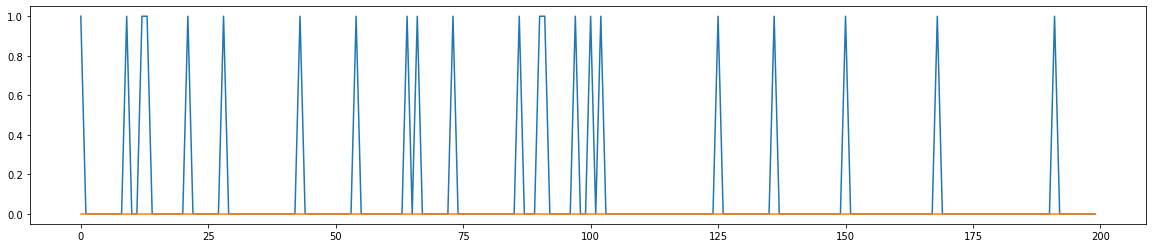

In [185]:
class_0_3 = []
class_1_3 = []
for i in range(0,X_train_3.shape[0]):
    if y_train_3[i] == 1:
        class_0_3.append((X_train_3[i]))
    else:
        class_1_3.append((X_train_3[i]))
class_0_3 = np.asarray(class_0_3)
class_1_3 = np.asarray(class_1_3)

train_3 = np.concatenate((class_0_3, class_1_3), axis=0)

#########################################################
lda_3 = LDA()
lda_3.train(train_3)
lda_prediction_3 = lda_3.use(X_test_3)

#########################################################

plt.figure(figsize = (20,4))
plt.plot(y_test_3[:200])
plt.plot(lda_prediction_3[:200])
cm = confusion_matrix(y_test_3, lda_prediction_3)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test_3, lda_prediction_3)
print("\n Classification Report: \n", cr)
print("Accuracy: ", 100 - np.mean(np.abs(y_test_3 - lda_prediction_3)) * 100, "%")

##########################################################

false_positive_3, true_positive_3, thresholds = roc_curve(y_test_3, lda_prediction_3)
roc_auc_3 = auc(false_positive_3, true_positive_3)
print("Receiver operating characteristic score:",roc_auc_3)

# Logistic regression



 Confusion Matrix: 
 [[1123  936]
 [ 276  131]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.55      0.65      2059
           1       0.12      0.32      0.18       407

    accuracy                           0.51      2466
   macro avg       0.46      0.43      0.41      2466
weighted avg       0.69      0.51      0.57      2466

Accuracy:  54.50953733138897 %
Receiver operating characteristic score: 0.43363885763108684


<Figure size 1440x1080 with 0 Axes>

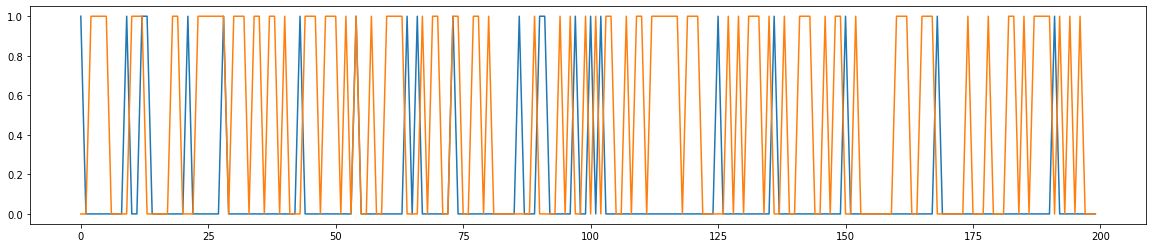

In [186]:
lr_3 = LogisticRegression()
lr_3.train(X_train_3,y_train_3)
logistic_prediction_3 = lr.use(X_test_3)
logistic_prediction_3 = np.argmax(logistic_prediction_3, 1)

#########################################################
plt.clf()
plt.figure(figsize = (20,4))
plt.plot(y_test_3[:200])
plt.plot(logistic_prediction_3[:200])
cm = confusion_matrix(y_test_3, logistic_prediction_3)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test_3, logistic_prediction_3)
print("\n Classification Report: \n", cr)
print("Accuracy: ", 100 - np.mean(np.abs(y_test_3 - logistic_prediction_3)) * 100, "%")

##########################################################

false_positive_3, true_positive_3, thresholds = roc_curve(y_test_3, logistic_prediction_3)
roc_auc = auc(false_positive_3, true_positive_3)
print("Receiver operating characteristic score:",roc_auc)

<Br>**Training Data:** First - Third and Fifth Set
<Br>**Testing Data:** Fourth Set

In [187]:
X_data_4 = df_class_4.iloc[:,0:6]
T_label_4 = df_class_4.iloc[:,6:]

X_train_4 = pd.concat([df_class_1,df_class_2,df_class_3,df_class_5])
y_train_4 = X_train_4.iloc[:,6:]
X_train_4 = X_train_4.drop('Revenue',axis=1)
X_test_4 = X_data_4
y_test_4 = T_label_4
y_train_4 = np.asarray(y_train_4)
X_train_4 = np.asarray(X_train_4)
X_test_4 = np.asarray(X_test_4)
y_test_4 = np.asarray(y_test_4)

# Pocket Algorithm

i:  0
W pocket:  (6,)
w_pocket:  (6,)
shape of X:  [[ 0.1959039   0.32122483 -0.43749104 -0.49372119  2.36732528 -0.50217586]
 [-0.42504599 -0.38005743  0.0359642  -0.10547417 -0.05735594  0.21103148]
 [-0.63202929 -0.56825297 -0.17117246 -0.06387629  0.3467576   0.21103148]
 ...
 [-0.63202929 -0.55752818  2.11916728  2.55679093 -0.46146947 -0.26444008]
 [-0.34977934 -0.29104479 -0.06696085 -0.35971222 -0.86558301 -0.50217586]
 [-0.63202929 -0.5533263  -0.43749104 -0.54918503  2.36732528 -0.26444008]]
y:  [ 0.02071549 -0.00255218 -0.00106073 ... -0.11543913  0.0025115
  0.01215463]

 Confusion Matrix: 
 [[ 642 1315]
 [  53  456]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.33      0.48      1957
           1       0.26      0.90      0.40       509

    accuracy                           0.45      2466
   macro avg       0.59      0.61      0.44      2466
weighted avg       0.79      0.45      0.47      2466

Accuracy

<Figure size 1440x1080 with 0 Axes>

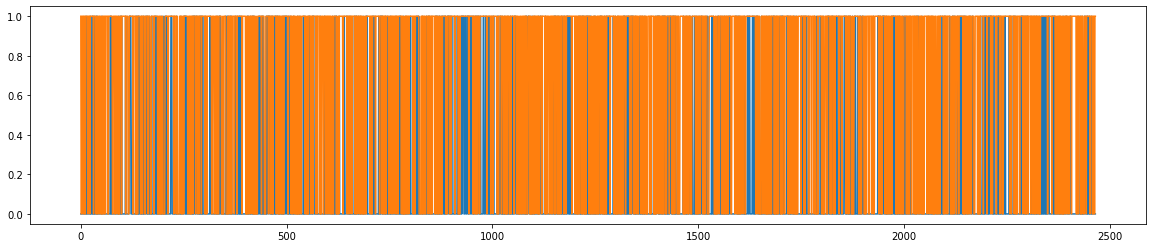

In [199]:
pa_4 = PocketAlgorithm()
pa_4.train(X_train_4, y_train_4)

pocket_prediction_4 = pa_4.use(X_test_4)
pocket_prediction_4 = np.sign(pocket_prediction_4)
for i in range(pocket_prediction_4.shape[0]):
    if pocket_prediction_4[i]==-1:
        pocket_prediction_4[i] = 0
# plt.plot(pocket_prediction)
plt.clf()
plt.figure(figsize = (20,4))
plt.plot(y_test_4)
plt.plot(pocket_prediction_4)
cm = confusion_matrix(y_test_4, pocket_prediction_4)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test_4, pocket_prediction_4)
print("\n Classification Report: \n", cr)
print("Accuracy: ", 100 - np.mean(np.abs(y_test_4 - pocket_prediction_4)) * 100, "%")

# QDA

In
sigma:  (6, 6)
In
sigma:  (6, 6)

 Confusion Matrix: 
 [[1671  286]
 [ 345  164]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1957
           1       0.36      0.32      0.34       509

    accuracy                           0.74      2466
   macro avg       0.60      0.59      0.59      2466
weighted avg       0.73      0.74      0.74      2466

Accuracy:  68.6442183032305 %
Receiver operating characteristic score: 0.5880291693813855


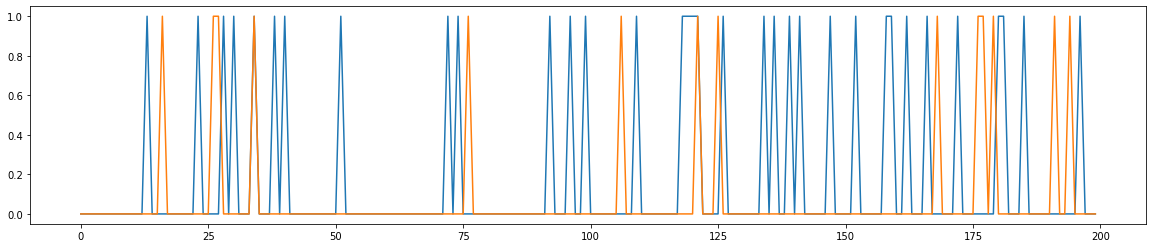

In [189]:
class_0_4 = []
class_1_4 = []
for i in range(0,X_train_4.shape[0]):
    if y_train_4[i] == 1:
        class_0_4.append((X_train_4[i]))
    else:
        class_1_4.append((X_train_4[i]))
class_0_4 = np.asarray(class_0_4)
class_1_4 = np.asarray(class_1_4)

train_4 = np.concatenate((class_0_4, class_1_4), axis=0)

#########################################################
qda_4 = QDA()
qda_4.train(train_4)
qda_prediction_4 = qda_4.use(X_test_4)

#########################################################

plt.figure(figsize = (20,4))
plt.plot(y_test_4[:200])
plt.plot(qda_prediction_4[:200])
cm = confusion_matrix(y_test_4, qda_prediction_4)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test_4, qda_prediction_4)
print("\n Classification Report: \n", cr)
print("Accuracy: ", 100 - np.mean(np.abs(y_test_4 - qda_prediction_4)) * 100, "%")

##########################################################

false_positive_4, true_positive_4, thresholds = roc_curve(y_test_4, qda_prediction_4)
roc_auc_4 = auc(false_positive_4, true_positive_4)
print("Receiver operating characteristic score:",roc_auc_4)

# LDA

mu:  [ 1.72131582e-02  7.43720824e-01 -2.06909890e-05 -2.87592434e-05
  3.50836305e-05 -2.83219716e-06]
mu:  [-2.88040304e-03 -1.24452218e-01  3.46237378e-06  4.81249351e-06
 -5.87079923e-06  4.73932165e-07]
sigma:  [[ 2.60176719e-03  9.34019544e-02 -6.24104369e-07 -8.95835371e-07
  -2.27142295e-06 -8.85551243e-06]
 [ 9.34019544e-02  4.44591094e+00 -2.43156028e-05 -3.33108228e-05
  -8.49741297e-05 -2.53586590e-04]
 [-6.24104369e-07 -2.43156028e-05  3.54561540e-09  3.24486202e-09
  -3.27808402e-09  2.08275131e-08]
 [-8.95835371e-07 -3.33108228e-05  3.24486202e-09  3.56998395e-09
  -3.82253546e-09  2.15918239e-08]
 [-2.27142295e-06 -8.49741297e-05 -3.27808402e-09 -3.82253546e-09
   8.43400935e-06  4.98219659e-07]
 [-8.85551243e-06 -2.53586590e-04  2.08275131e-08  2.15918239e-08
   4.98219659e-07  2.35086238e-05]]
sigma:  0.14334955393349555
sigma:  0.8566504460665044

 Confusion Matrix: 
 [[1949    8]
 [ 503    6]]

 Classification Report: 
               precision    recall  f1-score   

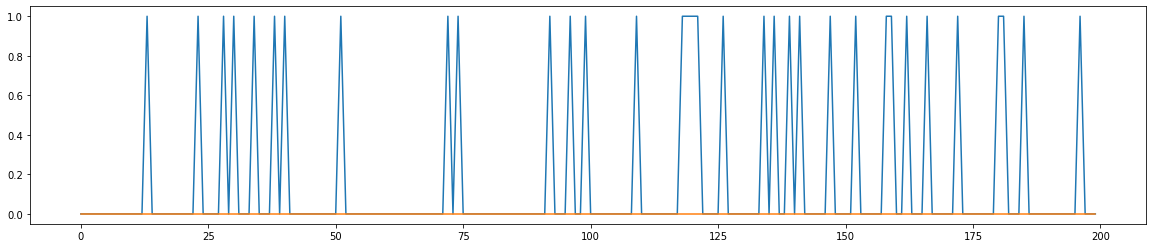

In [196]:
class_0_4 = []
class_1_4 = []
for i in range(0,X_train_4.shape[0]):
    if y_train_4[i] == 1:
        class_0_4.append((X_train_4[i]))
    else:
        class_1_4.append((X_train_4[i]))
class_0_4 = np.asarray(class_0_4)
class_1_4 = np.asarray(class_1_4)

train_4 = np.concatenate((class_0_4, class_1_4), axis=0)

#########################################################
lda_4 = LDA()
lda_4.train(train_4)
lda_prediction_4 = lda_4.use(X_test_4)

#########################################################

plt.figure(figsize = (20,4))
plt.plot(y_test_4[:200])
plt.plot(lda_prediction_4[:200])
cm = confusion_matrix(y_test_4, lda_prediction_4)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test_4, lda_prediction_4)
print("\n Classification Report: \n", cr)
print("Accuracy: ", 100 - np.mean(np.abs(y_test_4 - lda_prediction_4)) * 100, "%")

##########################################################

false_positive_4, true_positive_4, thresholds = roc_curve(y_test_4, lda_prediction_4)
roc_auc_4 = auc(false_positive_4, true_positive_4)
print("Receiver operating characteristic score:",roc_auc_4)

# Logistic regression



 Confusion Matrix: 
 [[1126  831]
 [ 312  197]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.58      0.66      1957
           1       0.19      0.39      0.26       509

    accuracy                           0.54      2466
   macro avg       0.49      0.48      0.46      2466
weighted avg       0.66      0.54      0.58      2466

Accuracy:  54.88130875116507 %
Receiver operating characteristic score: 0.4812019319093315


<Figure size 1440x1080 with 0 Axes>

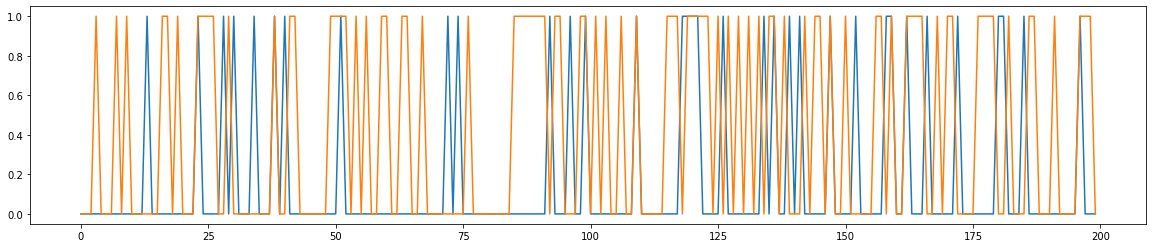

In [195]:
lr_4 = LogisticRegression()
lr_4.train(X_train_4,y_train_4)
logistic_prediction_4 = lr.use(X_test_4)
logistic_prediction_4 = np.argmax(logistic_prediction_4, 1)

#########################################################

plt.clf()
plt.figure(figsize = (20,4))
plt.plot(y_test_4[:200])
plt.plot(logistic_prediction_4[:200])
cm = confusion_matrix(y_test_4, logistic_prediction_4)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test_4, logistic_prediction_4)
print("\n Classification Report: \n", cr)
print("Accuracy: ", 100 - np.mean(np.abs(y_test_4 - logistic_prediction_4)) * 100, "%")

##########################################################

false_positive_4, true_positive_4, thresholds = roc_curve(y_test_4, logistic_prediction_4)
roc_auc_4 = auc(false_positive_4, true_positive_4)
print("Receiver operating characteristic score:",roc_auc_4)

<Br>**Training Data:** First - Fourth Set
<Br>**Testing Data:** Fifth Set

In [192]:
X_data_5 = df_class_5.iloc[:,0:6]
T_label_5 = df_class_5.iloc[:,6:]

X_train_5 = pd.concat([df_class_1,df_class_2,df_class_3,df_class_4])
y_train_5 = X_train_5.iloc[:,6:]
X_train_5 = X_train_5.drop('Revenue',axis=1)
X_test_5 = X_data_5
y_test_5 = T_label_5
y_train_5 = np.asarray(y_train_5)
X_train_5 = np.asarray(X_train_5)
X_test_5 = np.asarray(X_test_5)
y_test_5 = np.asarray(y_test_5)

# Pocket Algorithm

i:  0
W pocket:  (6,)
w_pocket:  (6,)
shape of X:  [[-0.72385824 -0.71570774  3.89945948  3.48415452 -0.0403065  -0.75294014]
 [-0.33757873  0.09523397 -0.42772053 -0.54202269 -0.0403065   1.27580254]
 [-0.61349266 -0.6505828   0.19044805 -0.12230538  2.39387714 -0.52752429]
 ...
 [-0.63188693 -0.63027835  1.37527113  1.01766759 -0.85170105  1.95205011]
 [-0.46633856 -0.55528131 -0.42772053 -0.41029854 -0.0403065   1.5012184 ]
 [-0.68706971 -0.70585496 -0.42772053  0.58240519 -0.85170105 -0.52752429]]
y:  [-0.24012127  0.04244871  0.00159796 ... -0.06598154  0.0338888
 -0.02609224]

 Confusion Matrix: 
 [[ 651 1321]
 [  36  458]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.33      0.49      1972
           1       0.26      0.93      0.40       494

    accuracy                           0.45      2466
   macro avg       0.60      0.63      0.45      2466
weighted avg       0.81      0.45      0.47      2466

Accuracy

<Figure size 1440x1080 with 0 Axes>

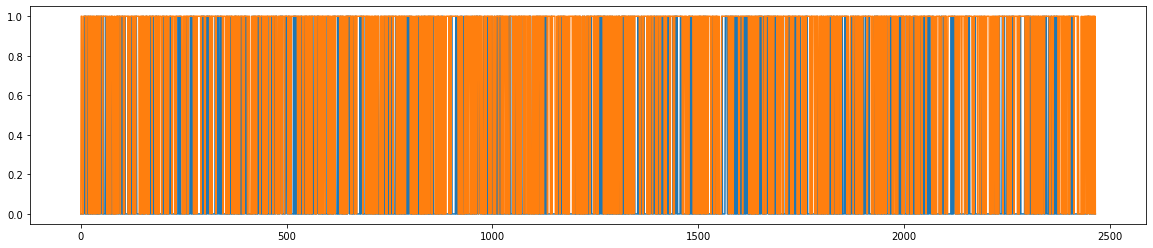

In [200]:
pa_5 = PocketAlgorithm()
pa_5.train(X_train_5, y_train_5)

pocket_prediction_5 = pa_5.use(X_test_5)
pocket_prediction_5 = np.sign(pocket_prediction_5)
for i in range(pocket_prediction_5.shape[0]):
    if pocket_prediction_5[i]==-1:
        pocket_prediction_5[i] = 0
# plt.plot(pocket_prediction)
plt.clf()
plt.figure(figsize = (20,4))
plt.plot(y_test_5)
plt.plot(pocket_prediction_5)
cm = confusion_matrix(y_test_5, pocket_prediction_5)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test_5, pocket_prediction_5)
print("\n Classification Report: \n", cr)
print("Accuracy: ", 100 - np.mean(np.abs(y_test_5 - pocket_prediction_5)) * 100, "%")

# QDA

In
sigma:  (6, 6)
In
sigma:  (6, 6)

 Confusion Matrix: 
 [[1154  818]
 [ 127  367]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.59      0.71      1972
           1       0.31      0.74      0.44       494

    accuracy                           0.62      2466
   macro avg       0.61      0.66      0.57      2466
weighted avg       0.78      0.62      0.65      2466

Accuracy:  51.16662029390465 %
Receiver operating characteristic score: 0.6640538387629239


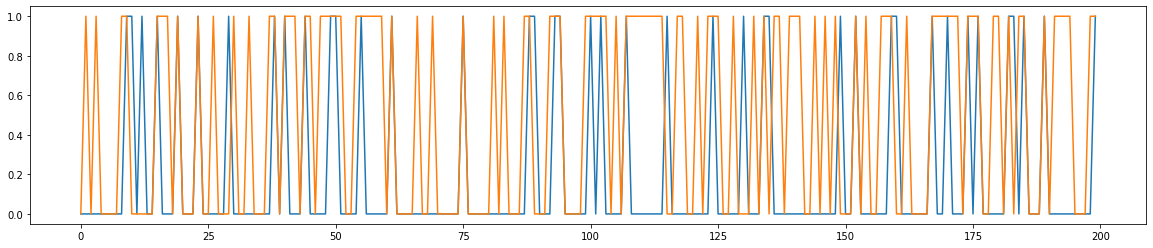

In [193]:
class_0_5 = []
class_1_5 = []
for i in range(0,X_train_5.shape[0]):
    if y_train_5[i] == 1:
        class_0_5.append((X_train_5[i]))
    else:
        class_1_5.append((X_train_5[i]))
class_0_5 = np.asarray(class_0_5)
class_1_5 = np.asarray(class_1_5)

train_5 = np.concatenate((class_0_5, class_1_5), axis=0)

#########################################################
qda_5 = QDA()
qda_5.train(train_5)
qda_prediction_5 = qda_5.use(X_test_5)

#########################################################

plt.figure(figsize = (20,4))
plt.plot(y_test_5[:200])
plt.plot(qda_prediction_5[:200])
cm = confusion_matrix(y_test_5, qda_prediction_5)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test_5, qda_prediction_5)
print("\n Classification Report: \n", cr)
print("Accuracy: ", 100 - np.mean(np.abs(y_test_5 - qda_prediction_5)) * 100, "%")

##########################################################

false_positive_5, true_positive_5, thresholds = roc_curve(y_test_5, qda_prediction_5)
roc_auc_5 = auc(false_positive_5, true_positive_5)
print("Receiver operating characteristic score:",roc_auc_5)

# LDA

mu:  [ 1.41052500e-02  5.94030101e-01 -2.08670196e-05 -2.84543037e-05
 -6.81026177e-05 -9.32264080e-05]
mu:  [-2.36033413e-03 -9.94033803e-02  3.49183027e-06  4.76146573e-06
  1.13961067e-05  1.56002534e-05]
sigma:  [[ 2.33914944e-03  8.72352103e-02 -5.62050274e-07 -8.09648068e-07
  -1.95322099e-06 -2.63375752e-06]
 [ 8.72352103e-02  4.61785322e+00 -2.18561865e-05 -2.98659915e-05
  -7.67566913e-05 -1.06441029e-04]
 [-5.62050274e-07 -2.18561865e-05  3.28626028e-09  3.00835952e-09
  -1.51945107e-09  1.99223122e-08]
 [-8.09648068e-07 -2.98659915e-05  3.00835952e-09  3.31095608e-09
  -2.24350713e-09  1.97489973e-08]
 [-1.95322099e-06 -7.67566913e-05 -1.51945107e-09 -2.24350713e-09
   7.78128394e-06  3.33185721e-07]
 [-2.63375752e-06 -1.06441029e-04  1.99223122e-08  1.97489973e-08
   3.33185721e-07  2.09365868e-05]]
sigma:  0.14334955393349555
sigma:  0.8566504460665044

 Confusion Matrix: 
 [[1972    0]
 [ 493    1]]

 Classification Report: 
               precision    recall  f1-score   

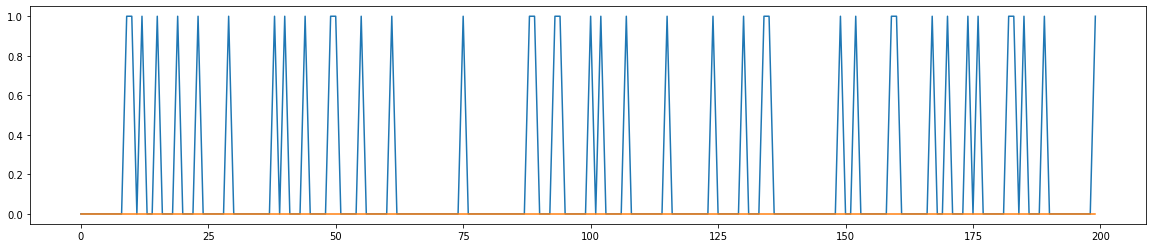

In [191]:
class_0_5 = []
class_1_5 = []
for i in range(0,X_train_5.shape[0]):
    if y_train_5[i] == 1:
        class_0_5.append((X_train_5[i]))
    else:
        class_1_5.append((X_train_5[i]))
class_0_5 = np.asarray(class_0_5)
class_1_5 = np.asarray(class_1_5)

train_5 = np.concatenate((class_0_5, class_1_5), axis=0)

#########################################################
lda_5 = LDA()
lda_5.train(train_5)
lda_prediction_5 = lda_5.use(X_test_5)

#########################################################

plt.figure(figsize = (20,4))
plt.plot(y_test_5[:200])
plt.plot(lda_prediction_5[:200])
cm = confusion_matrix(y_test_5, lda_prediction_5)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test_5, lda_prediction_5)
print("\n Classification Report: \n", cr)
print("Accuracy: ", 100 - np.mean(np.abs(y_test_5 - lda_prediction_5)) * 100, "%")

##########################################################

false_positive_5, true_positive_5, thresholds = roc_curve(y_test_5, lda_prediction_5)
roc_auc_5 = auc(false_positive_5, true_positive_5)
print("Receiver operating characteristic score:",roc_auc_5)

# Logistic regression



 Confusion Matrix: 
 [[1094  878]
 [ 327  167]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.55      0.64      1972
           1       0.16      0.34      0.22       494

    accuracy                           0.51      2466
   macro avg       0.46      0.45      0.43      2466
weighted avg       0.65      0.51      0.56      2466

Accuracy:  54.569262817793195 %
Receiver operating characteristic score: 0.4464117072209311


<Figure size 1440x1080 with 0 Axes>

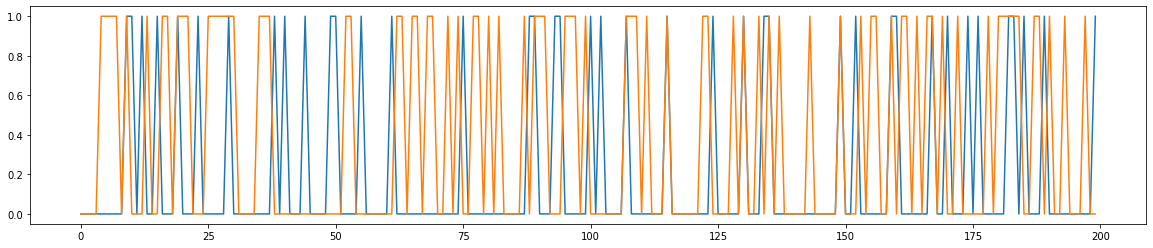

In [194]:
lr_5 = LogisticRegression()
lr_5.train(X_train_5,y_train_5)
logistic_prediction_5 = lr.use(X_test_5)
logistic_prediction_5 = np.argmax(logistic_prediction_5, 1)

#########################################################

plt.clf()
plt.figure(figsize = (20,4))
plt.plot(y_test_5[:200])
plt.plot(logistic_prediction_5[:200])
cm = confusion_matrix(y_test_5, logistic_prediction_5)
print("\n Confusion Matrix: \n", cm)
cr = classification_report(y_test_5, logistic_prediction_5)
print("\n Classification Report: \n", cr)
print("Accuracy: ", 100 - np.mean(np.abs(y_test_5 - logistic_prediction_5)) * 100, "%")

##########################################################

false_positive_5, true_positive_5, thresholds = roc_curve(y_test_5, logistic_prediction_5)
roc_auc_5 = auc(false_positive_5, true_positive_5)
print("Receiver operating characteristic score:",roc_auc_5)

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 



points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)